# I.Data Collection, Cleaning, and EDA

In [1]:
#kaggle.json is key necessary to pull data 
#uncomment pip install for dataset to download (2.8 GB)
#!pip install kaggle
#!pip install opendatasets
import opendatasets as od
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import os
from pmdarima.utils import tsdisplay
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

In [2]:
od.download("https://www.kaggle.com/c/g-research-crypto-forecasting/data?select=train.csv")

  0%|          | 0.00/1.11G [00:00<?, ?B/s]

100%|██████████| 1.11G/1.11G [01:38<00:00, 12.2MB/s]



Extracting archive .\g-research-crypto-forecasting/g-research-crypto-forecasting.zip to .\g-research-crypto-forecasting


###### Read in CSV

In [3]:
train=pd.read_csv('g-research-crypto-forecasting/train.csv')

In [4]:
train.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.5800,2399.5000,2357.1400,2374.5900,19.233005,2373.116392,-0.004218
1,1514764860,0,5.0,8.5300,8.5300,8.5300,8.5300,78.380000,8.530000,-0.014399
2,1514764860,1,229.0,13835.1940,14013.8000,13666.1100,13850.1760,31.550062,13827.062093,-0.014643
3,1514764860,5,32.0,7.6596,7.6596,7.6567,7.6576,6626.713370,7.657713,-0.013922
4,1514764860,7,5.0,25.9200,25.9200,25.8740,25.8770,121.087310,25.891363,-0.008264


###### Format timestamp to datetime in minutes

In [5]:
train["date"]=pd.to_datetime(train.timestamp,unit="s")

In [6]:
train.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,date
0,1514764860,2,40.0,2376.5800,2399.5000,2357.1400,2374.5900,19.233005,2373.116392,-0.004218,2018-01-01 00:01:00
1,1514764860,0,5.0,8.5300,8.5300,8.5300,8.5300,78.380000,8.530000,-0.014399,2018-01-01 00:01:00
2,1514764860,1,229.0,13835.1940,14013.8000,13666.1100,13850.1760,31.550062,13827.062093,-0.014643,2018-01-01 00:01:00
3,1514764860,5,32.0,7.6596,7.6596,7.6567,7.6576,6626.713370,7.657713,-0.013922,2018-01-01 00:01:00
4,1514764860,7,5.0,25.9200,25.9200,25.8740,25.8770,121.087310,25.891363,-0.008264,2018-01-01 00:01:00


In [7]:
train.set_index(train["date"],inplace=True)

In [8]:
train.sort_index()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,date
date,,,,,,,,,,,
2018-01-01 00:01:00,1514764860,2,40.0,2376.580000,2399.500000,2357.140000,2374.590000,1.923301e+01,2373.116392,-0.004218,2018-01-01 00:01:00
2018-01-01 00:01:00,1514764860,0,5.0,8.530000,8.530000,8.530000,8.530000,7.838000e+01,8.530000,-0.014399,2018-01-01 00:01:00
2018-01-01 00:01:00,1514764860,1,229.0,13835.194000,14013.800000,13666.110000,13850.176000,3.155006e+01,13827.062093,-0.014643,2018-01-01 00:01:00
2018-01-01 00:01:00,1514764860,5,32.0,7.659600,7.659600,7.656700,7.657600,6.626713e+03,7.657713,-0.013922,2018-01-01 00:01:00
2018-01-01 00:01:00,1514764860,7,5.0,25.920000,25.920000,25.874000,25.877000,1.210873e+02,25.891363,-0.008264,2018-01-01 00:01:00
...,...,...,...,...,...,...,...,...,...,...,...
2021-09-21 00:00:00,1632182400,9,775.0,157.181571,157.250000,156.700000,156.943857,4.663725e+03,156.994319,NaN,2021-09-21 00:00:00
2021-09-21 00:00:00,1632182400,10,34.0,2437.065067,2438.000000,2430.226900,2432.907467,3.975460e+00,2434.818747,NaN,2021-09-21 00:00:00
2021-09-21 00:00:00,1632182400,13,380.0,0.091390,0.091527,0.091260,0.091349,2.193732e+06,0.091388,NaN,2021-09-21 00:00:00


In [9]:
#make the assets readable by name and category
train["Asset_Name"]=train["Asset_ID"]
train["Asset_Name"].replace({0:'Binance_Coin',1:'Bitcoin',2:'Bitcoin_Cash',3:'Cardano',4:'Dogecoin',5:"EOS",6:"Ethereum",7:"Ethereum_Classic",8:"IOTA",9:"Litecoin",10:"Maker",11:"Monero",12:"Stellar",13:"TRON"},inplace=True)
train["Asset_ID"]=train["Asset_Name"]
train["Asset_ID"]=train["Asset_ID"].astype("category")

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24236806 entries, 2018-01-01 00:01:00 to 2021-09-21 00:00:00
Data columns (total 12 columns):
 #   Column      Dtype         
---  ------      -----         
 0   timestamp   int64         
 1   Asset_ID    category      
 2   Count       float64       
 3   Open        float64       
 4   High        float64       
 5   Low         float64       
 6   Close       float64       
 7   Volume      float64       
 8   VWAP        float64       
 9   Target      float64       
 10  date        datetime64[ns]
 11  Asset_Name  object        
dtypes: category(1), datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 2.2+ GB


In [11]:
train.isna().sum()

timestamp          0
Asset_ID           0
Count              0
Open               0
High               0
Low                0
Close              0
Volume             0
VWAP               9
Target        750338
date               0
Asset_Name         0
dtype: int64

In [12]:
#deleting columns that are duplicates,null, or not usable for price predictions 
train.drop(columns=["Asset_Name",'date','timestamp','Count','VWAP','Target'],inplace=True)

In [13]:
train.head()

,Asset_ID,Open,High,Low,Close,Volume
date,,,,,,
2018-01-01 00:01:00,Bitcoin_Cash,2376.5800,2399.5000,2357.1400,2374.5900,19.233005
2018-01-01 00:01:00,Binance_Coin,8.5300,8.5300,8.5300,8.5300,78.380000
2018-01-01 00:01:00,Bitcoin,13835.1940,14013.8000,13666.1100,13850.1760,31.550062
2018-01-01 00:01:00,EOS,7.6596,7.6596,7.6567,7.6576,6626.713370
2018-01-01 00:01:00,Ethereum_Classic,25.9200,25.9200,25.8740,25.8770,121.087310


###### Split data up by cryptocurrency hidden

In [14]:
# for EDA of each crypto split into seperate df's

binance_coin=train.loc[train["Asset_ID"]=="Binance_Coin"]
bitcoin=train.loc[train["Asset_ID"]=="Bitcoin"]
bitcoin_cash=train.loc[train["Asset_ID"]=="Bitcoin_Cash"]
cardano=train.loc[train["Asset_ID"]=="Cardano"]
dogecoin=train.loc[train["Asset_ID"]=="Dogecoin"]
eos_io=train.loc[train["Asset_ID"]=="EOS"]
ethereum=train.loc[train["Asset_ID"]=="Ethereum"]
ethereum_classic=train.loc[train["Asset_ID"]=="Ethereum_Classic"]
iota = train.loc[train["Asset_ID"]=="IOTA"]
monero=train.loc[train["Asset_ID"]=="Monero"]
litecoin=train.loc[train["Asset_ID"]=="Litecoin"]
maker=train.loc[train["Asset_ID"]=="Maker"]
stellar = train.loc[train["Asset_ID"]=="Stellar"]
tron = train.loc[train["Asset_ID"]=="TRON"]

###### Resample hourly, daily, weekly hidden

In [15]:
#for hourly resampling
#code borrowed from https://www.kaggle.com/toomuchsauce/g-crypto-interactive-dashboard-indicators/notebook
hour = {
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
}


h_binance_coin = binance_coin.resample('H').apply(hour)
h_bitcoin = bitcoin.resample('H').apply(hour)
h_bitcoin_cash = bitcoin_cash.resample('H').apply(hour)
h_cardano = cardano.resample('H').apply(hour)
h_eos_io = eos_io.resample('H').apply(hour)
h_ethereum = ethereum.resample('H').apply(hour)
h_ethereum_classic = ethereum_classic.resample('H').apply(hour)
h_iota = iota.resample('H').apply(hour)
h_monero = monero.resample('H').apply(hour)
h_litecoin = litecoin.resample('H').apply(hour)
h_maker = maker.resample('H').apply(hour)
h_stellar = stellar.resample('H').apply(hour)
h_dogecoin = dogecoin.resample('H').apply(hour)
h_tron = tron.resample('H').apply(hour)

# Resampling all datasets for daily values
#code borrowed from https://www.kaggle.com/toomuchsauce/g-crypto-interactive-dashboard-indicators/notebook
day = {
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
}

d_bitcoin_cash = bitcoin_cash.resample('D').apply(day)
d_binance_coin = binance_coin.resample('D').apply(day)
d_bitcoin = bitcoin.resample('D').apply(day)
d_eos_io = eos_io.resample('D').apply(day)
d_ethereum_classic = ethereum_classic.resample('D').apply(day)
d_ethereum = ethereum.resample('D').apply(day)
d_litecoin = litecoin.resample('D').apply(day)
d_monero = monero.resample('D').apply(day)
d_tron = tron.resample('D').apply(day)
d_stellar = stellar.resample('D').apply(day)
d_cardano = cardano.resample('D').apply(day)
d_iota = iota.resample('D').apply(day)
d_maker = maker.resample('D').apply(day)
d_dogecoin = dogecoin.resample('D').apply(day)


# Resampling all datasets for weekly values
#code borrowed from https://www.kaggle.com/toomuchsauce/g-crypto-interactive-dashboard-indicators/notebook
week = {
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
}

w_bitcoin_cash = bitcoin_cash.resample('W').apply(week)
w_binance_coin = binance_coin.resample('W').apply(week)
w_bitcoin = bitcoin.resample('W').apply(week)
w_eos_io = eos_io.resample('W').apply(week)
w_ethereum_classic = ethereum_classic.resample('W').apply(week)
w_ethereum = ethereum.resample('W').apply(week)
w_litecoin = litecoin.resample('W').apply(week)
w_monero = monero.resample('W').apply(week)
w_tron = tron.resample('W').apply(week)
w_stellar = stellar.resample('W').apply(week)
w_cardano = cardano.resample('W').apply(week)
w_iota = iota.resample('W').apply(week)
w_maker = maker.resample('W').apply(week)
w_dogecoin = dogecoin.resample('W').apply(week)

###### Hidden lists for iternation for alt-coins

In [16]:
#String list for iteration
str_alt_coins=[
'Binance_Coin',
'Bitcoin_Cash',
'Cardano',
'Dogecoin',
"EOS",
"Ethereum",
"Ethereum_Classic",
"IOTA",
"Litecoin",
"Maker",
"Monero",
"Stellar",
"TRON"]

#create list for hourly altcoin prices
h_alt_coins=[
h_binance_coin,
h_bitcoin_cash,
h_cardano,
h_dogecoin,
h_eos_io,
h_ethereum,
h_ethereum_classic,
h_iota,
h_litecoin,
h_maker,
h_monero,
h_stellar,
h_tron]

#create list for DAILY alt coin prices
d_alt_coins=[
d_binance_coin,
d_bitcoin_cash,
d_cardano,
d_dogecoin,
d_eos_io,
d_ethereum,
d_ethereum_classic,
d_iota,
d_litecoin,
d_maker,
d_monero,
d_stellar,
d_tron]

#list for weekly alt coin dfs for iteration
w_alt_coins=[
w_binance_coin,
w_bitcoin_cash,
w_cardano,
w_dogecoin,
w_eos_io,
w_ethereum,
w_ethereum_classic,
w_iota,
w_litecoin,
w_maker,
w_monero,
w_stellar,
w_tron]

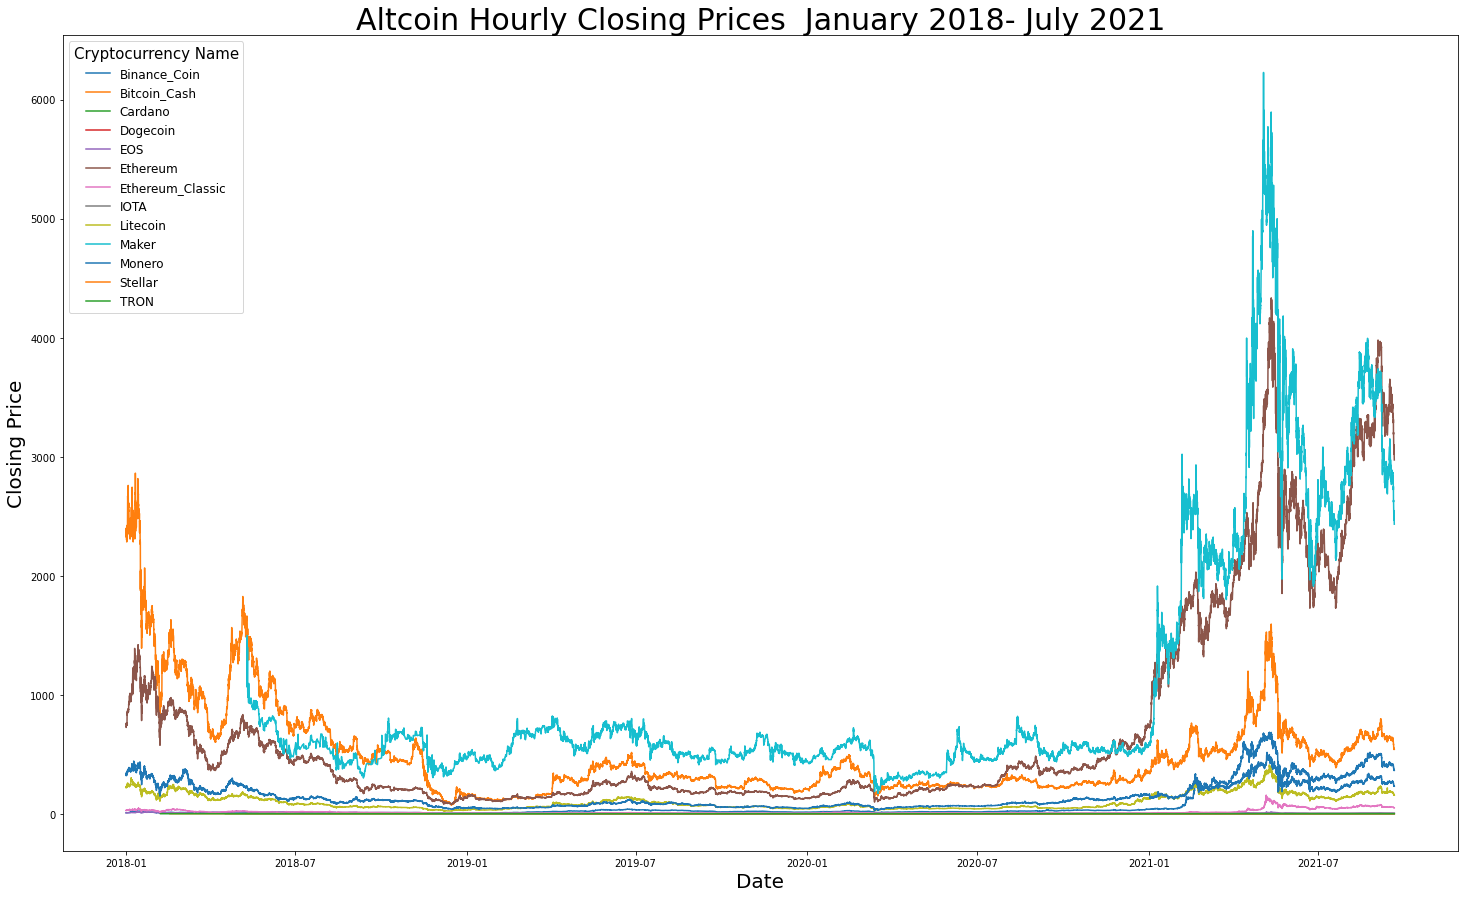

In [17]:
#alt coins only because Bitcoin is too high above all 
plt.figure(figsize=(25,15))
plt.title("Altcoin Hourly Closing Prices  January 2018- July 2021", fontdict={"fontsize":30})
[sns.lineplot(data=i,x=i.index,y=i["Close"],legend="auto") for i in h_alt_coins]
plt.legend(title="Cryptocurrency Name",title_fontsize=15,fontsize=12,labels=[i for i in str_alt_coins]);
plt.xlabel(xlabel="Date",fontdict={'fontsize':20})
plt.ylabel(ylabel="Closing Price",fontdict={'fontsize':20});

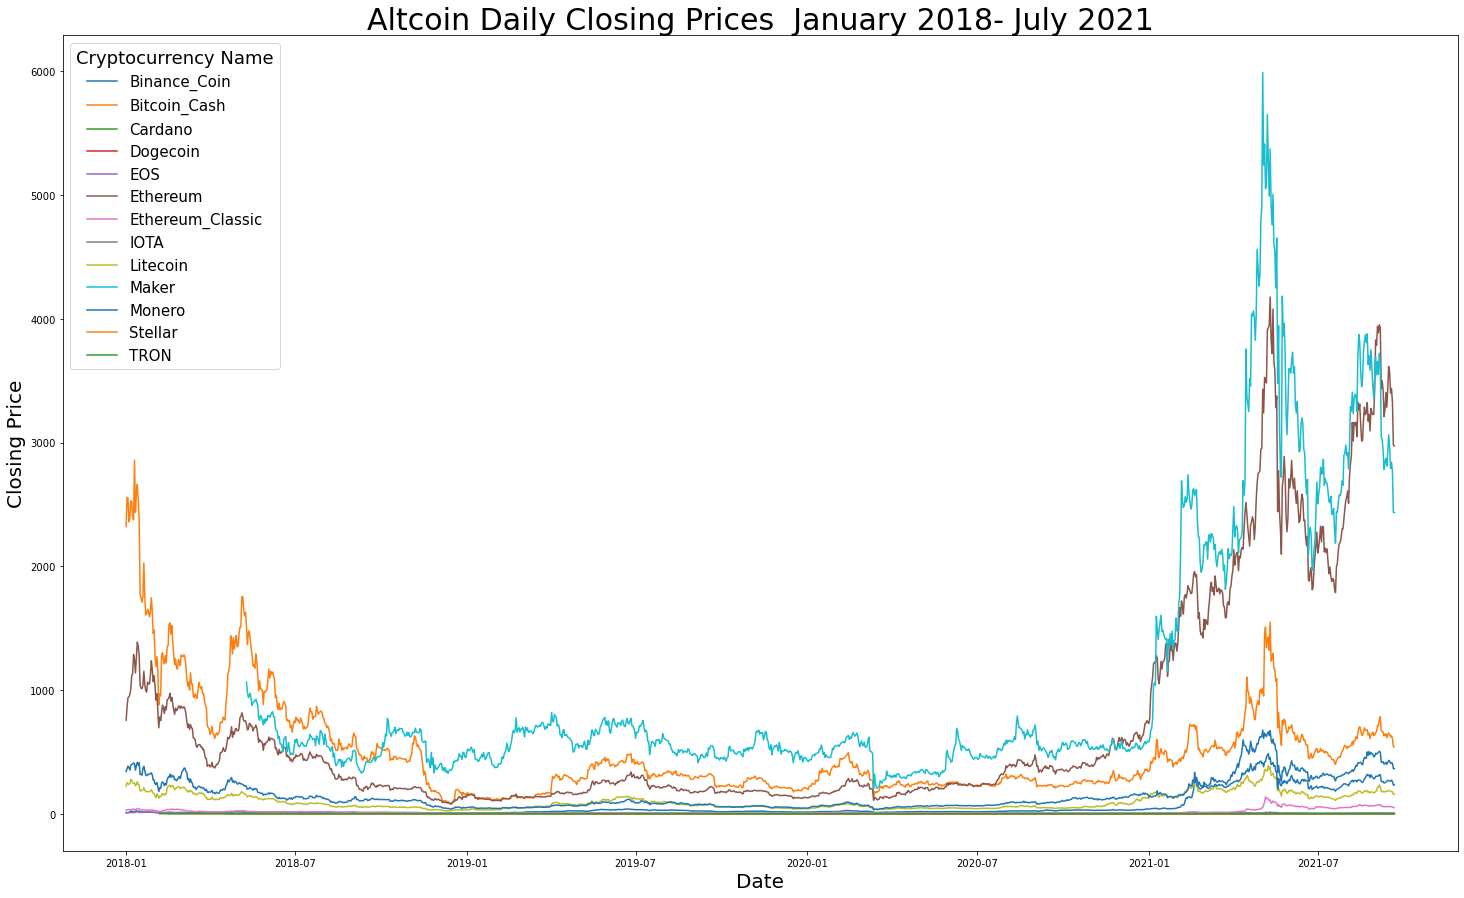

In [18]:
#alt coins only because Bitcoin is too high above all 
plt.figure(figsize=(25,15))
plt.title("Altcoin Daily Closing Prices  January 2018- July 2021", fontdict={"fontsize":30})
[sns.lineplot(data=i,x=i.index,y=i["Close"],legend="auto") for i in d_alt_coins]
plt.legend(title="Cryptocurrency Name",title_fontsize=18,fontsize=15,labels=[i for i in str_alt_coins]);
plt.xlabel(xlabel="Date",fontdict={'fontsize':20})
plt.ylabel(ylabel="Closing Price",fontdict={'fontsize':20});

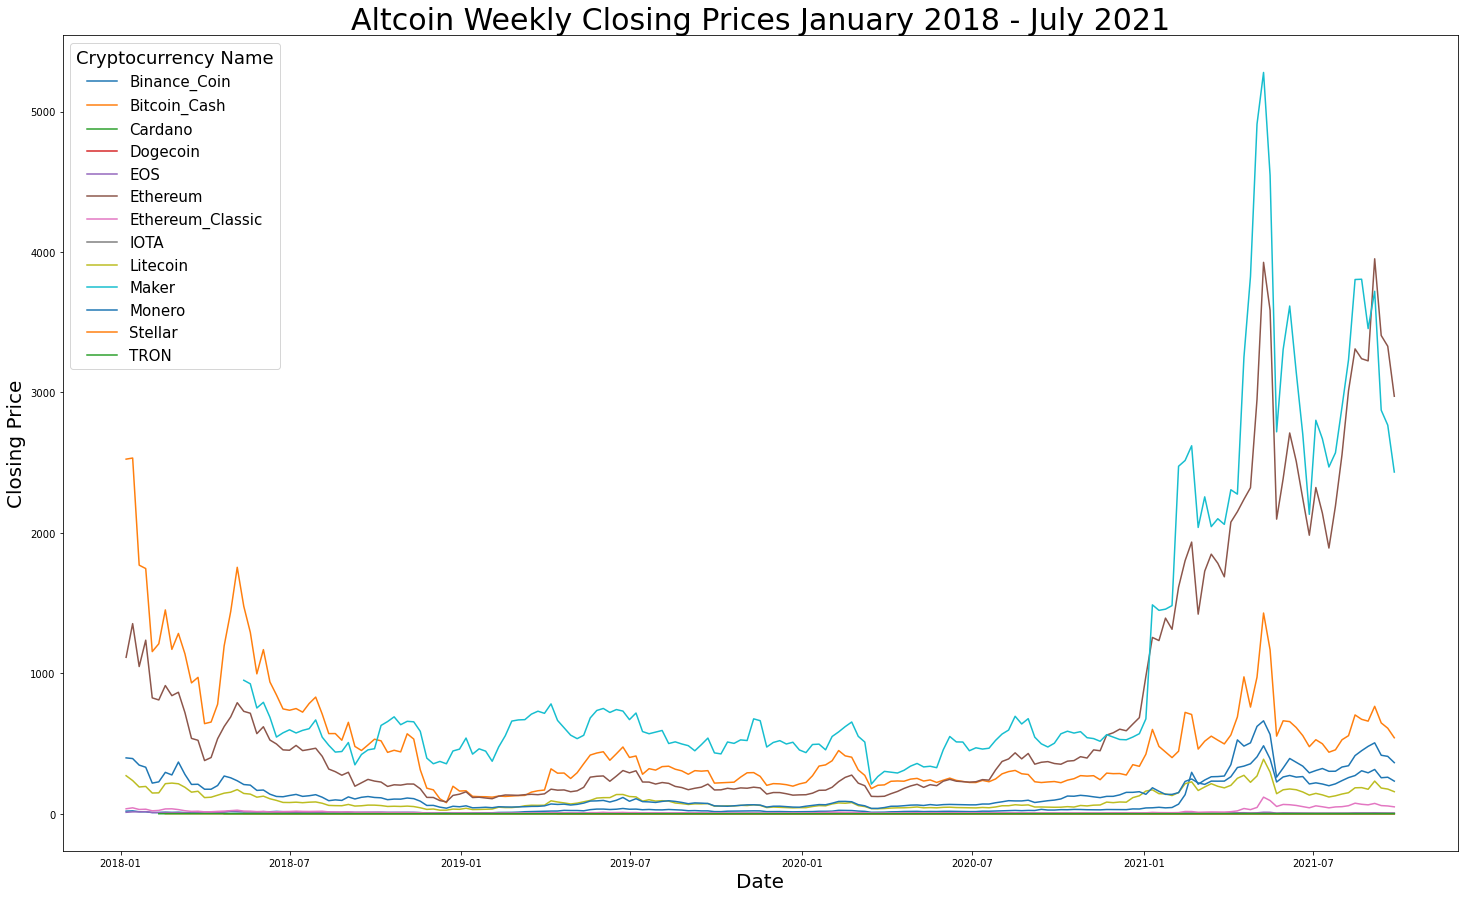

In [19]:
#alt coins only because Bitcoin is too high above all 
plt.figure(figsize=(25,15))
plt.title("Altcoin Weekly Closing Prices January 2018 - July 2021", fontdict={"fontsize":30})
[sns.lineplot(data=i,x=i.index,y=i["Close"],legend="auto") for i in w_alt_coins]
plt.legend(title="Cryptocurrency Name",title_fontsize=18,fontsize=15,labels=[i for i in str_alt_coins])
plt.xlabel(xlabel="Date",fontdict={'fontsize':20})
plt.ylabel(ylabel="Closing Price",fontdict={'fontsize':20});

###### Hidden Lists for iteration 

In [20]:
#lists for iteration on all coins

str_coins=['Binance_Coin','Bitcoin','Bitcoin_Cash','Cardano','Dogecoin',"EOS","Ethereum","Ethereum_Classic","IOTA","Litecoin","Maker","Monero","Stellar","TRON"]

h_coins=[h_binance_coin,h_bitcoin,h_bitcoin_cash,h_cardano,h_dogecoin,h_eos_io,h_ethereum,h_ethereum_classic,h_iota,h_litecoin,h_maker,h_monero,h_stellar,h_tron]

d_coins=[d_binance_coin,d_bitcoin,d_bitcoin_cash,d_cardano,d_dogecoin,d_eos_io,d_ethereum,d_ethereum_classic,d_iota,d_litecoin,d_maker,d_monero,d_stellar,d_tron]

#list of all cryptos
w_coins=[w_binance_coin,w_bitcoin,w_bitcoin_cash,w_cardano,w_dogecoin,w_eos_io,w_ethereum,w_ethereum_classic,w_iota,w_litecoin,w_maker,w_monero,w_stellar,w_tron]

In [21]:
#function for hourly charts individually
def hourly_chart_maker(list1,list2):
    for i in range(0,len(list1)):
        plt.figure(figsize=(20,11))
        plt.title(f"{list1[i]} Hourly Closing Prices January 2018 - July 2021", fontdict={"fontsize":20})
        sns.lineplot(data=list2[i], x=list2[i].index,y=list2[i]["Close"])
        plt.xlabel(xlabel="Date",fontdict={'fontsize':12})
        plt.ylabel(ylabel="Closing Price",fontdict={'fontsize':12})

In [22]:
#function for daily charts individually
def daily_chart_maker(list1,list2):
    for i in range(0,len(list1)):
        plt.figure(figsize=(20,11))
        plt.title(f"{list1[i]} Daily Closing Prices January 2018 - July 2021", fontdict={"fontsize":20})
        sns.lineplot(data=list2[i], x=list2[i].index,y=list2[i]["Close"])
        plt.xlabel(xlabel="Date",fontdict={'fontsize':12})
        plt.ylabel(ylabel="Closing Price",fontdict={'fontsize':12})
     

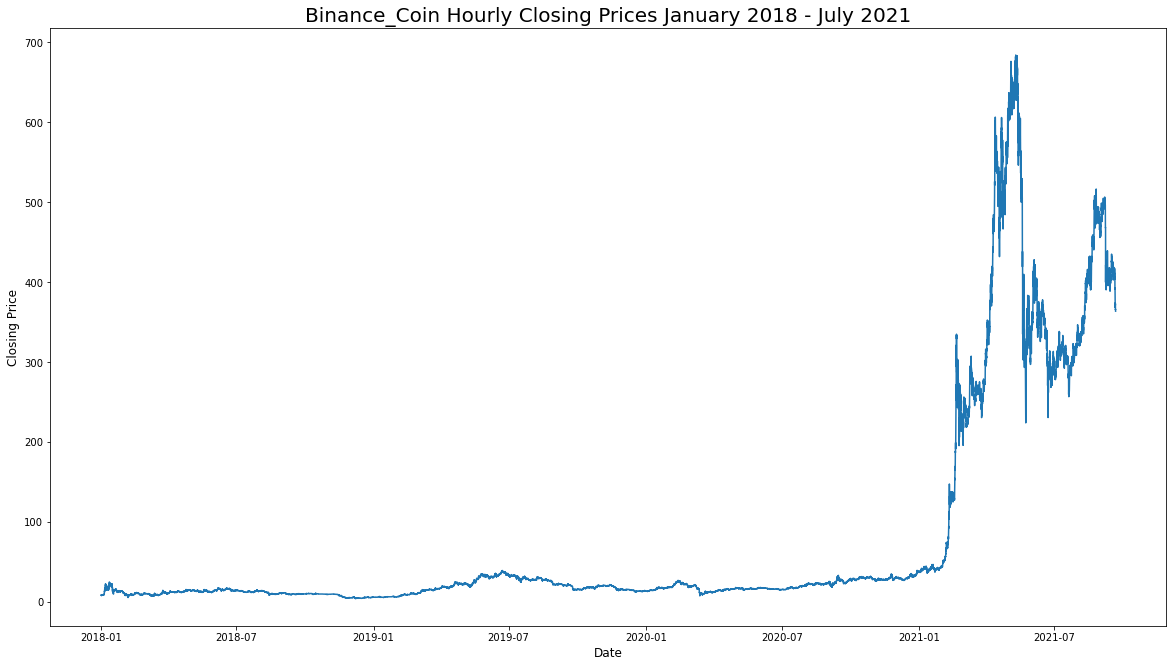

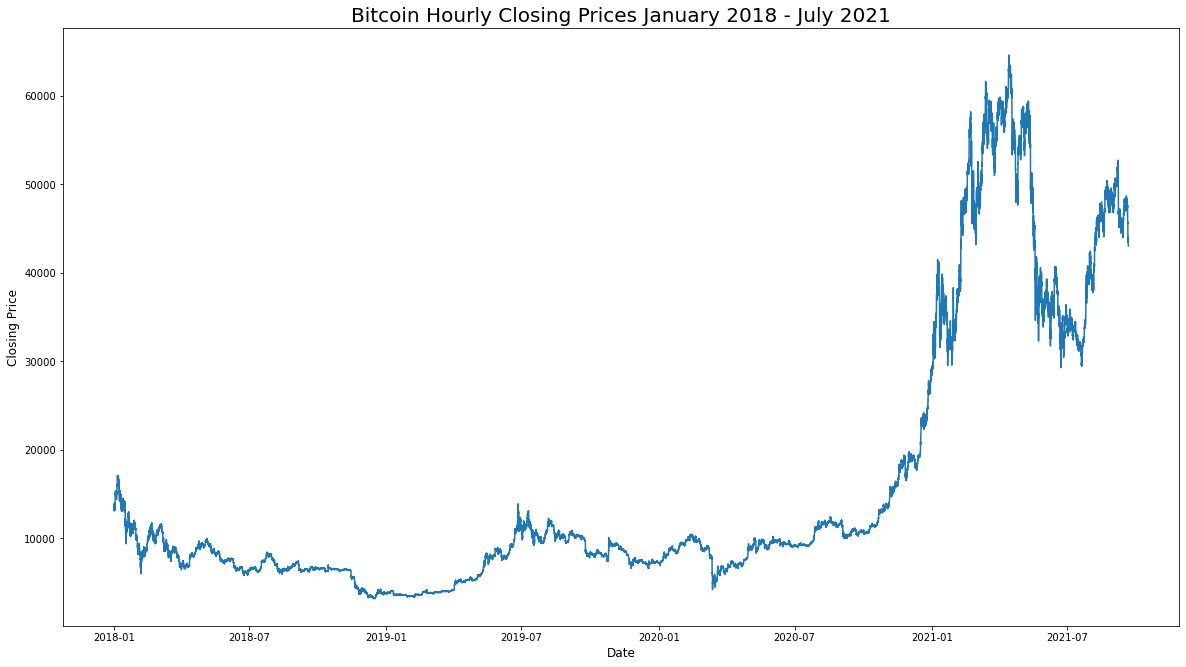

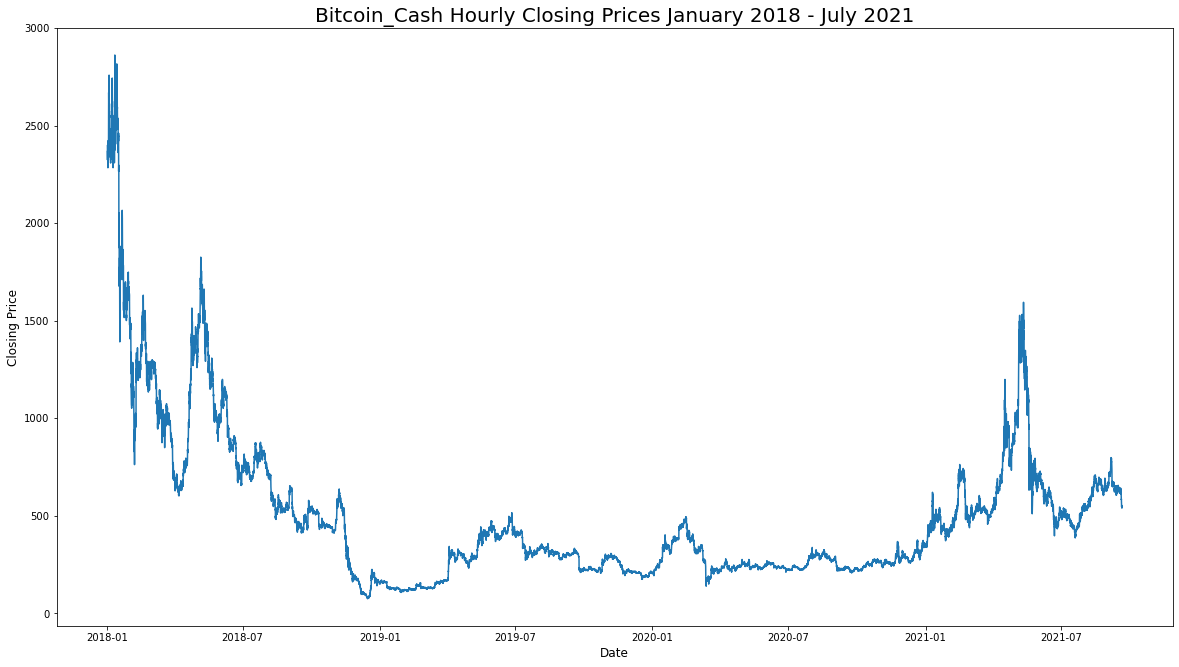

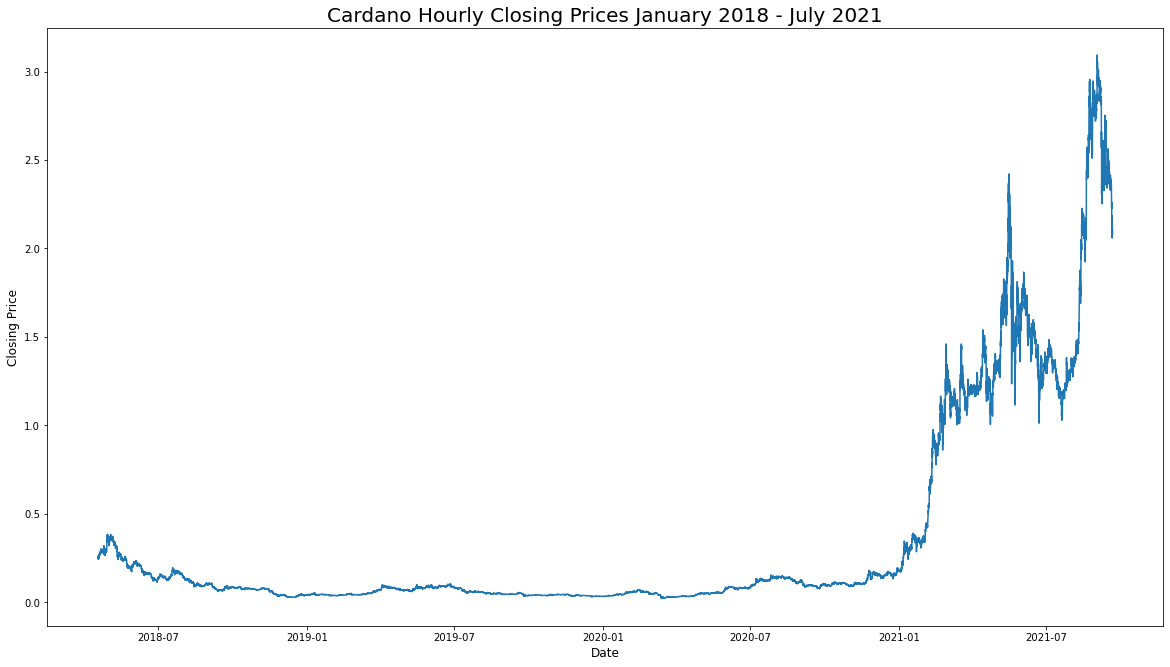

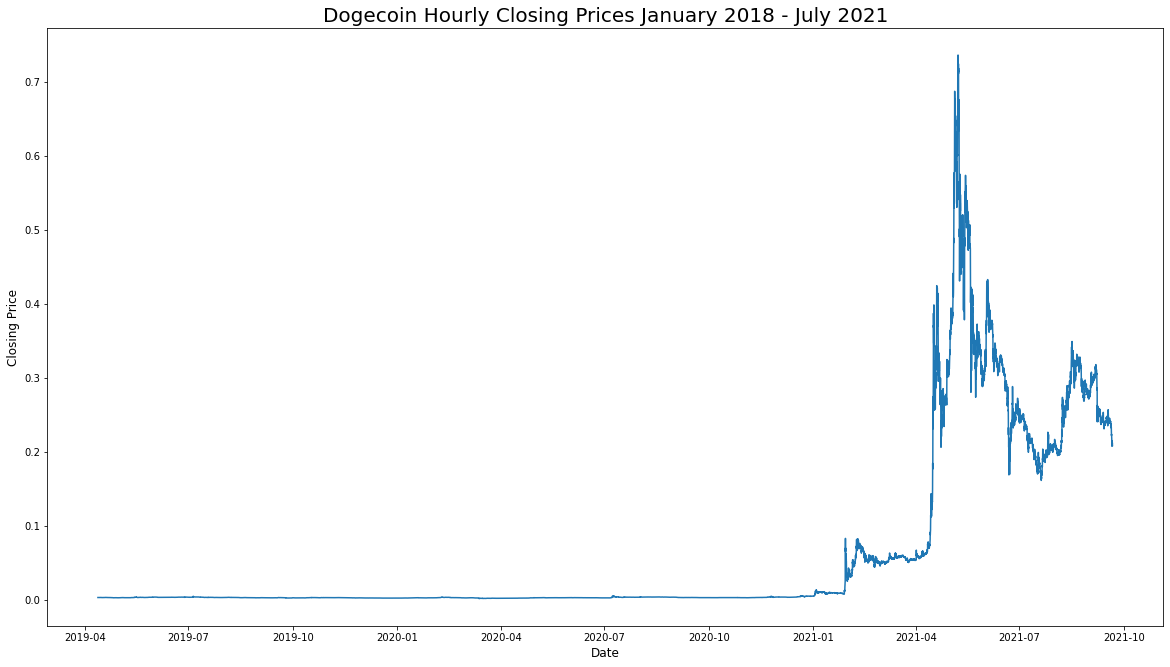

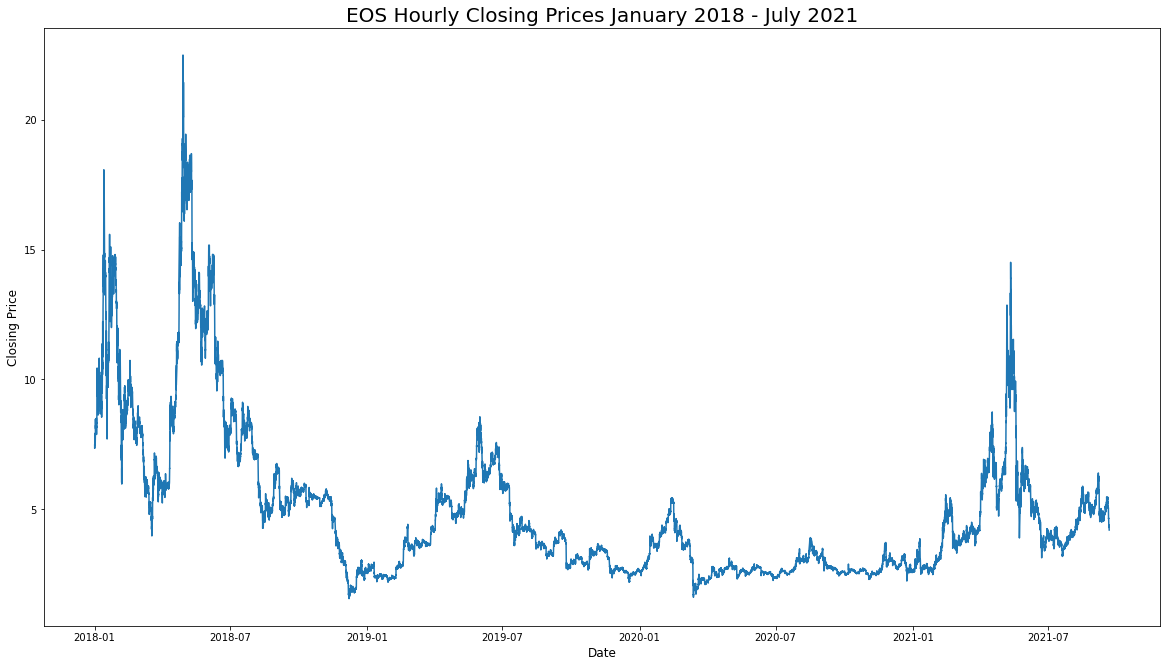

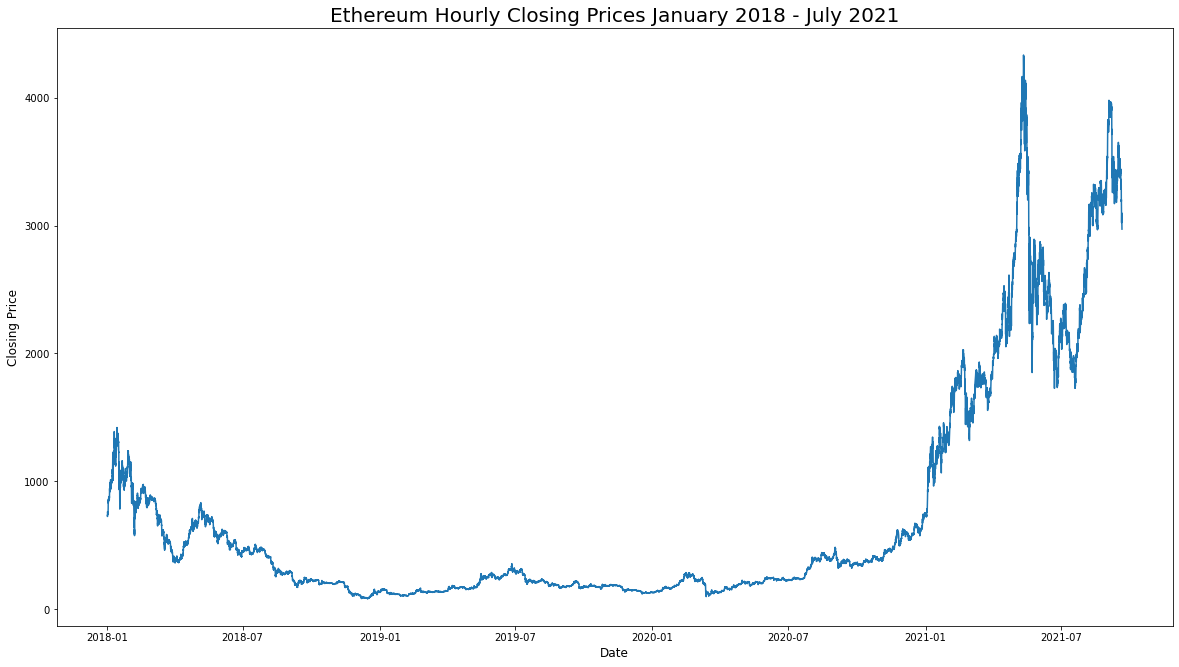

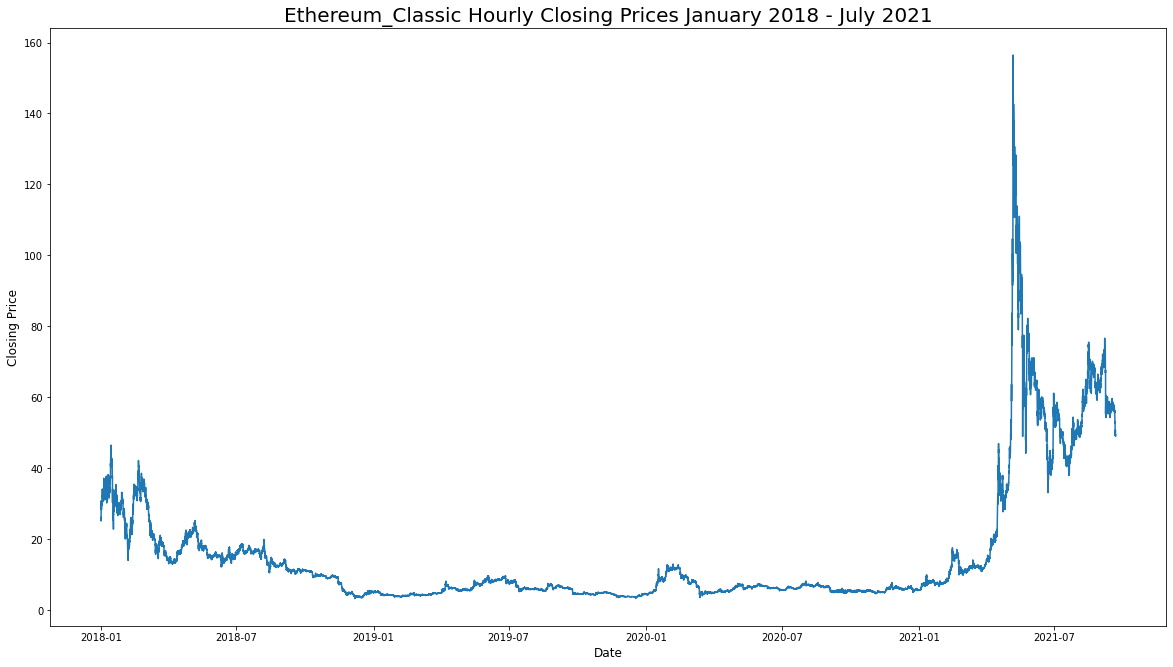

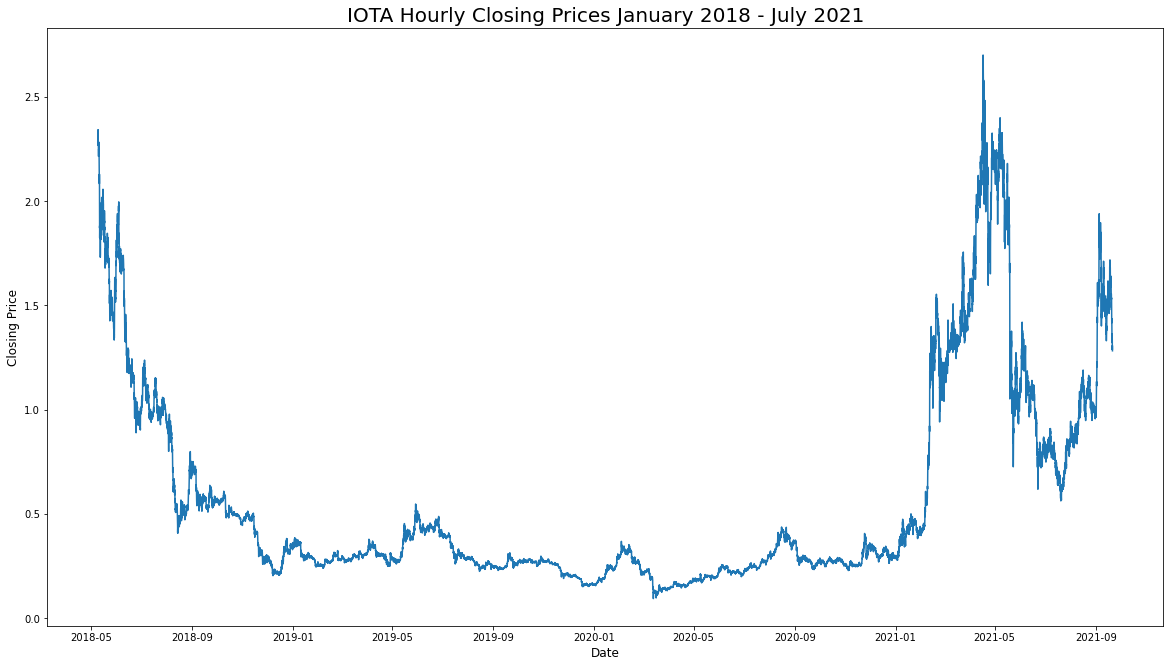

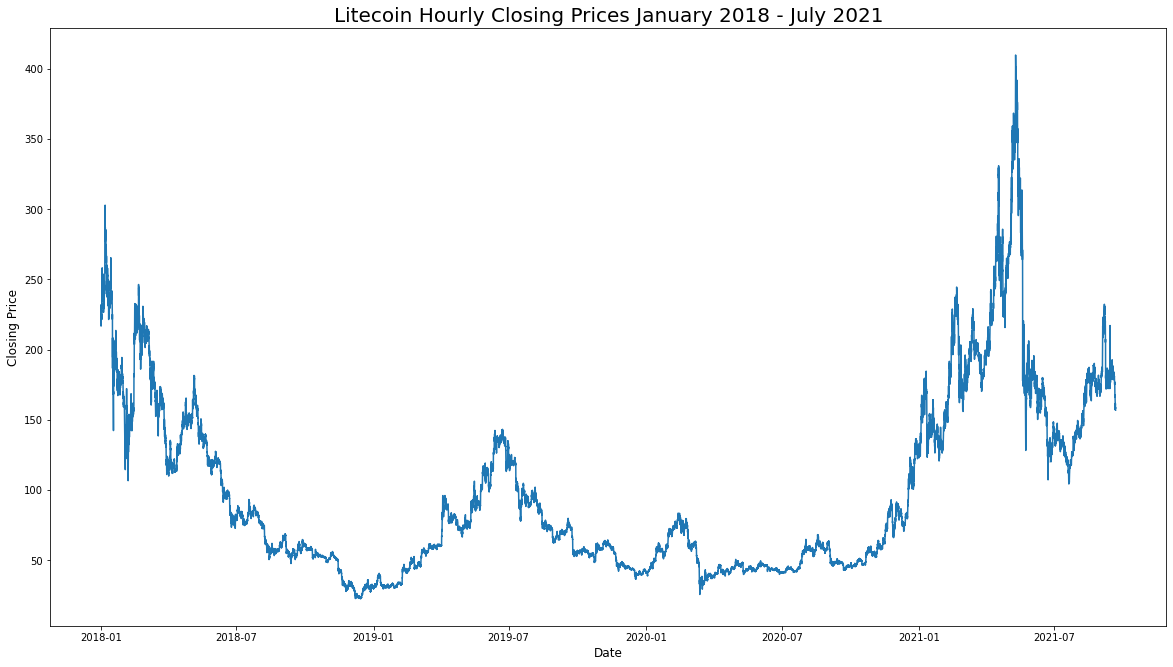

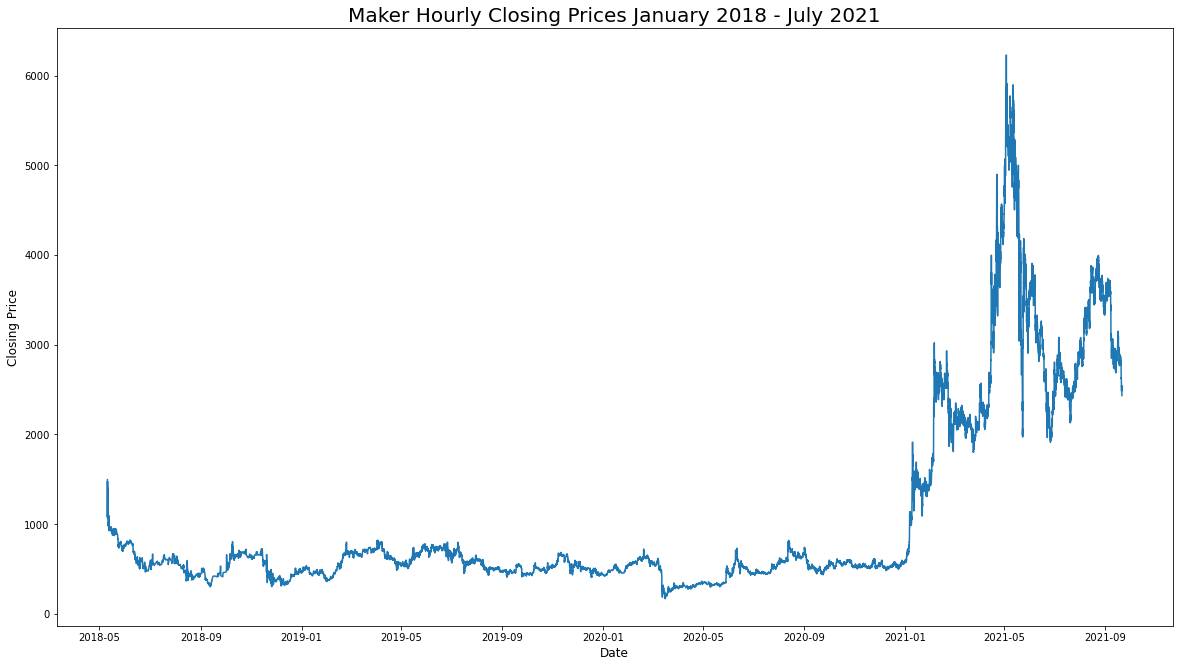

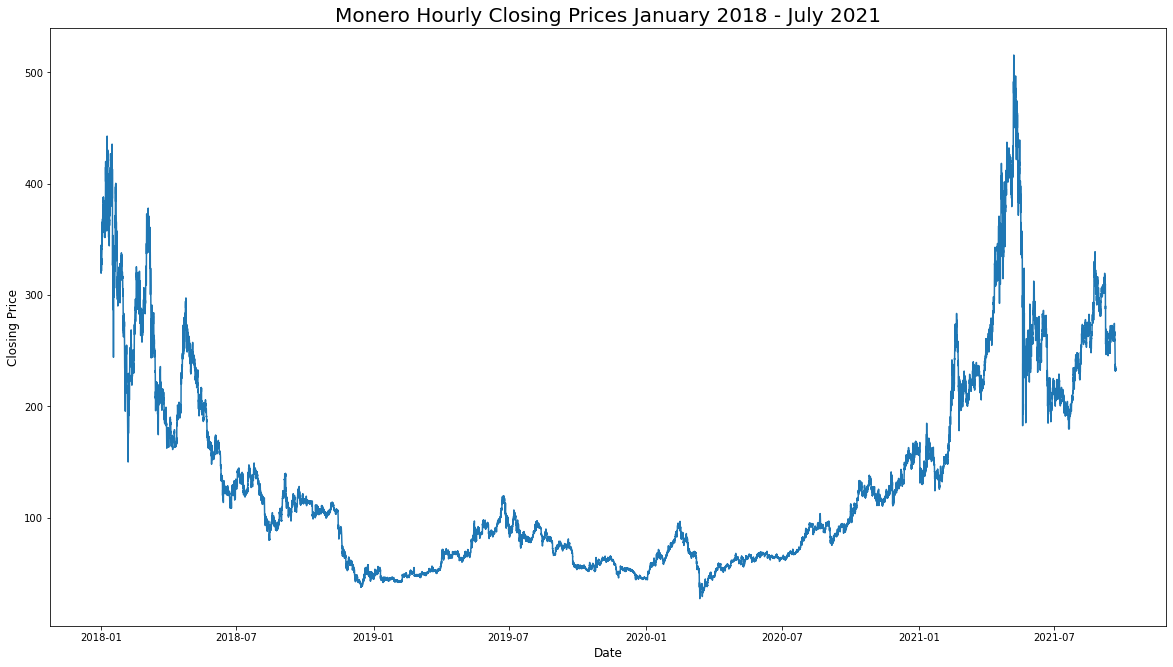

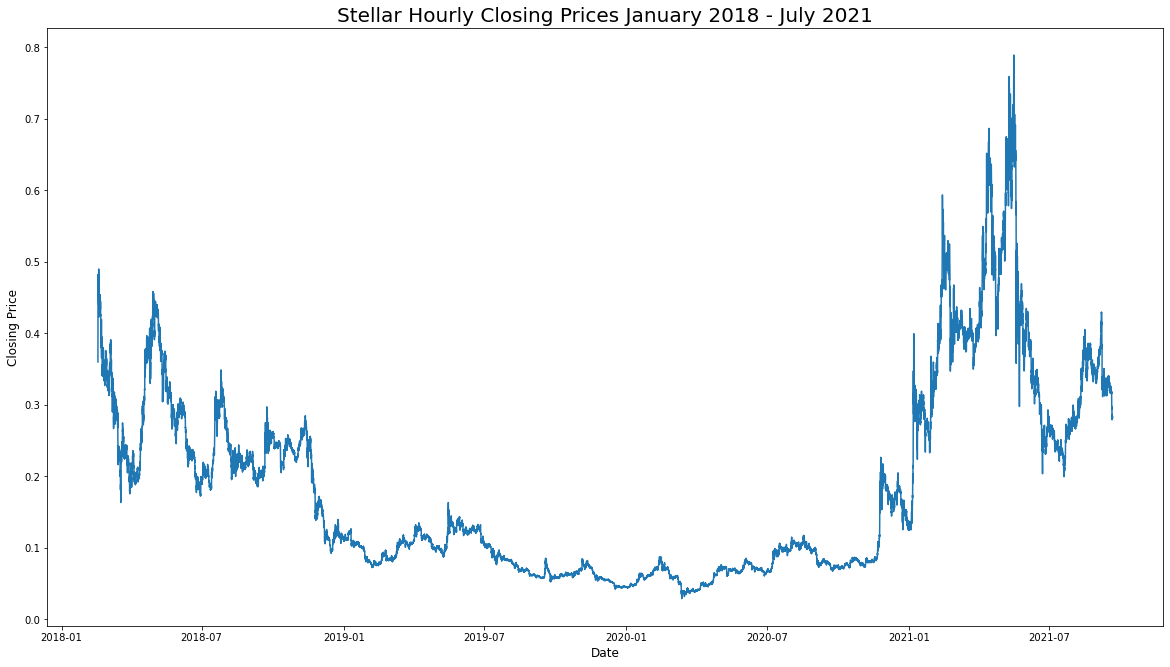

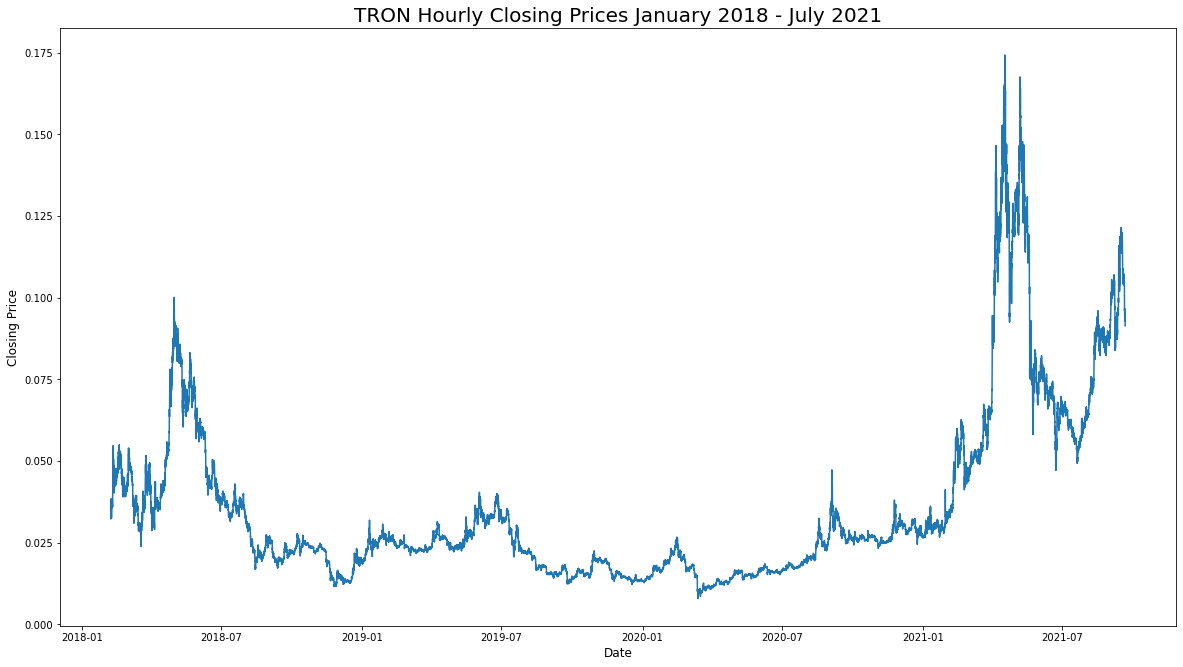

In [23]:
hourly_chart_maker(str_coins,h_coins)

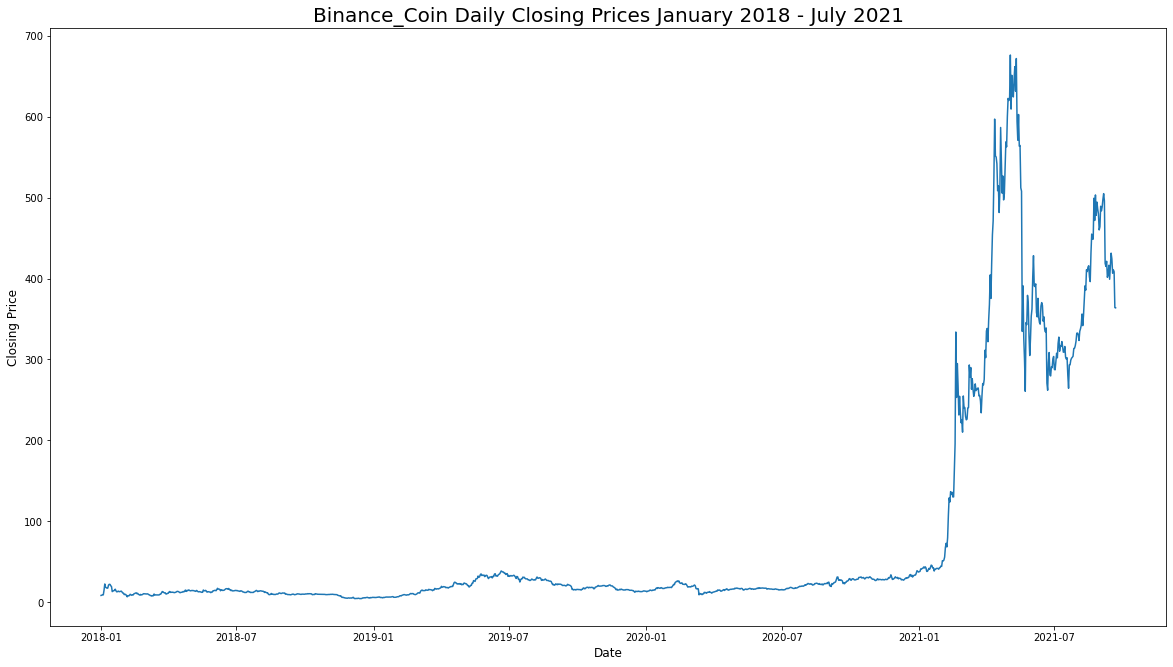

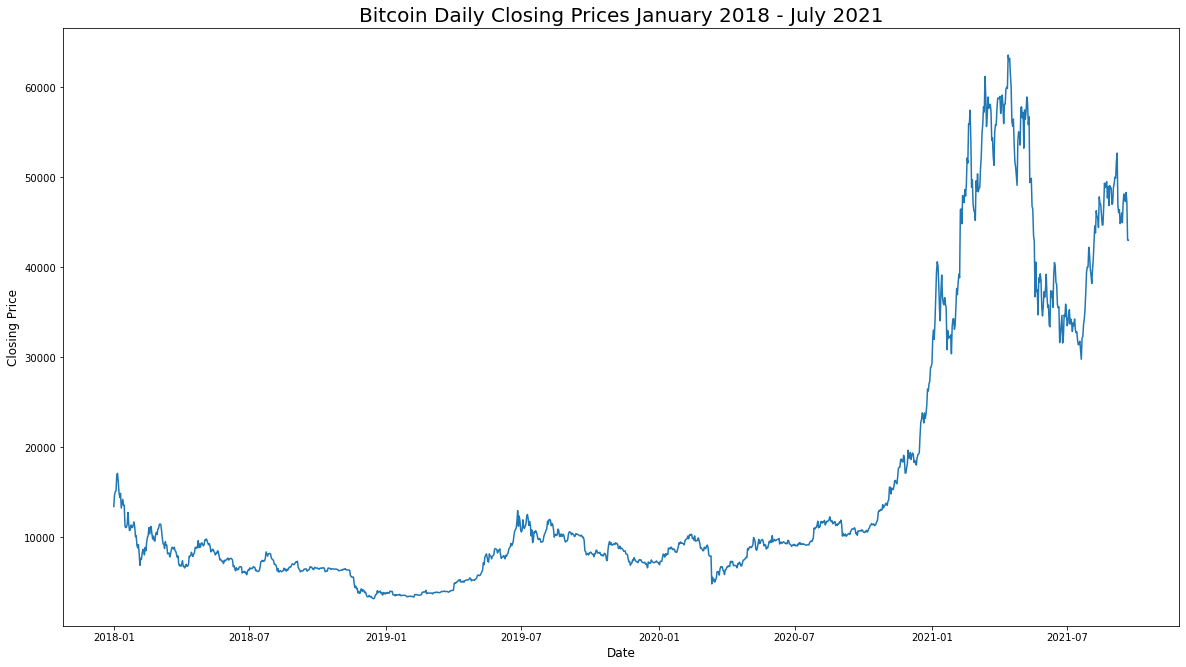

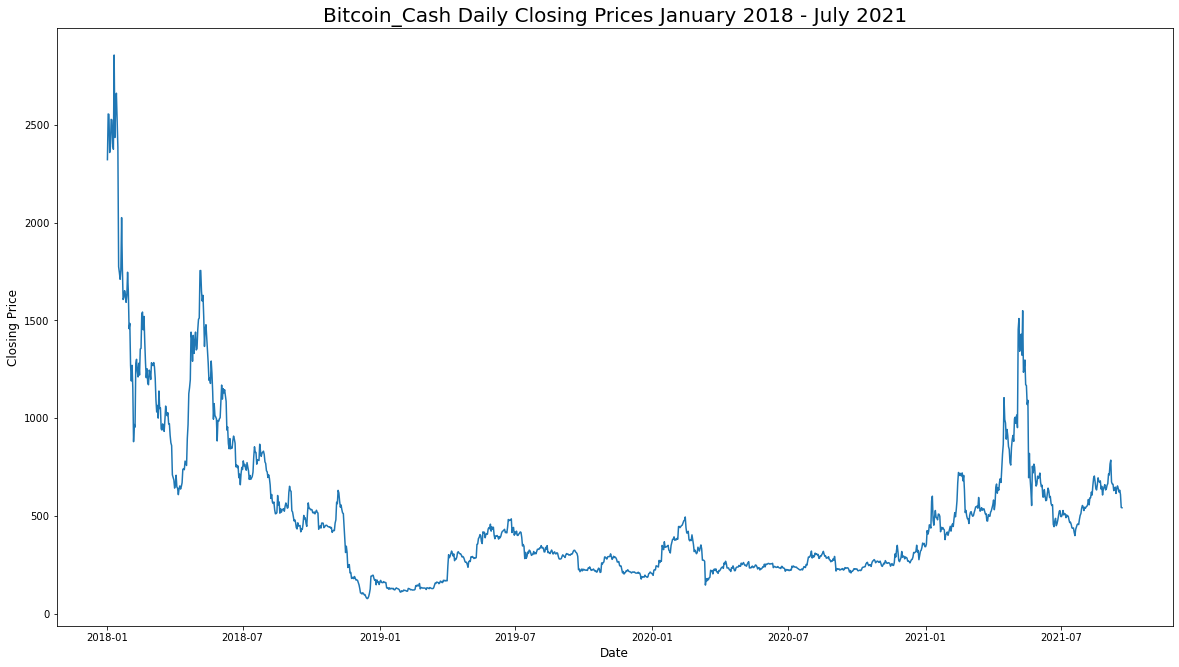

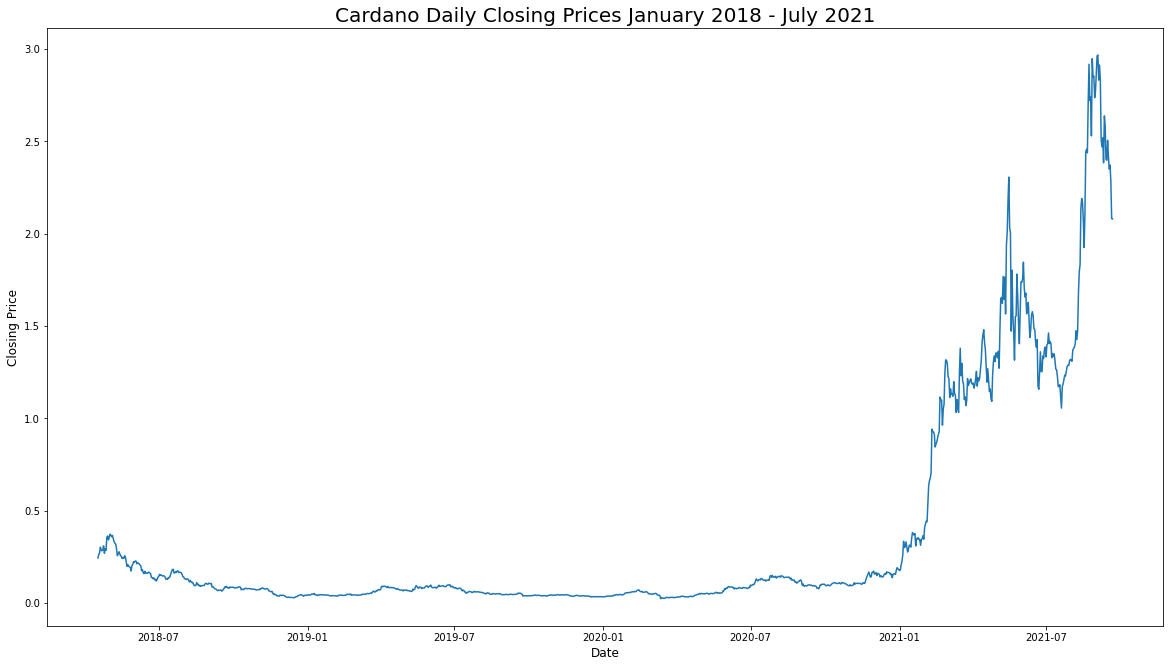

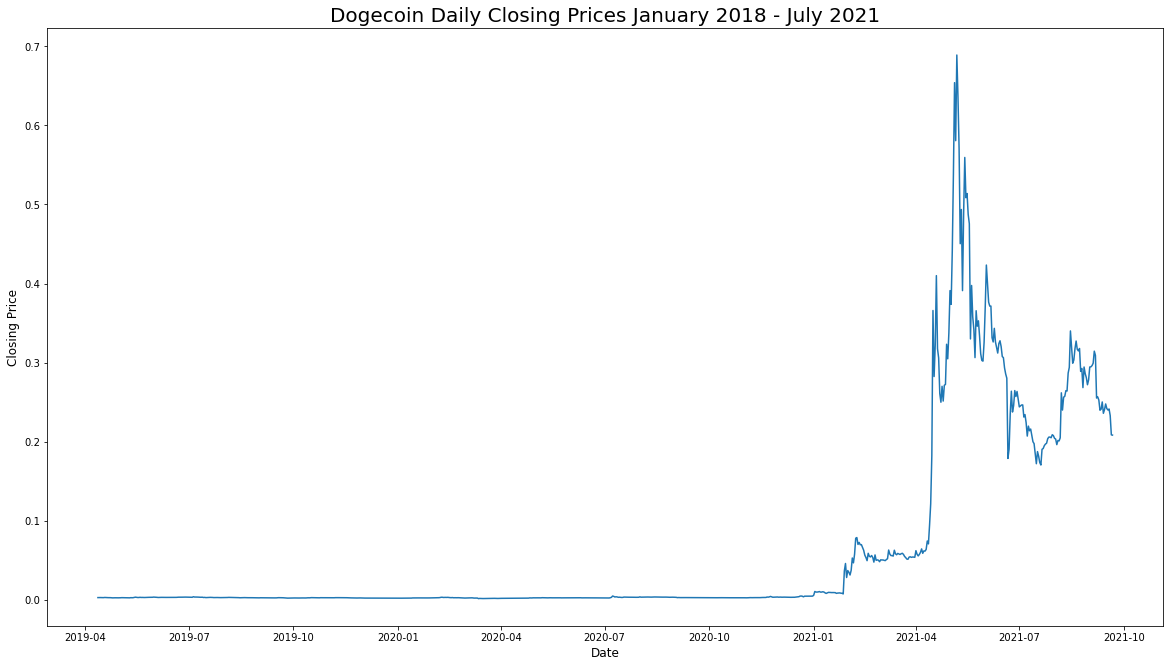

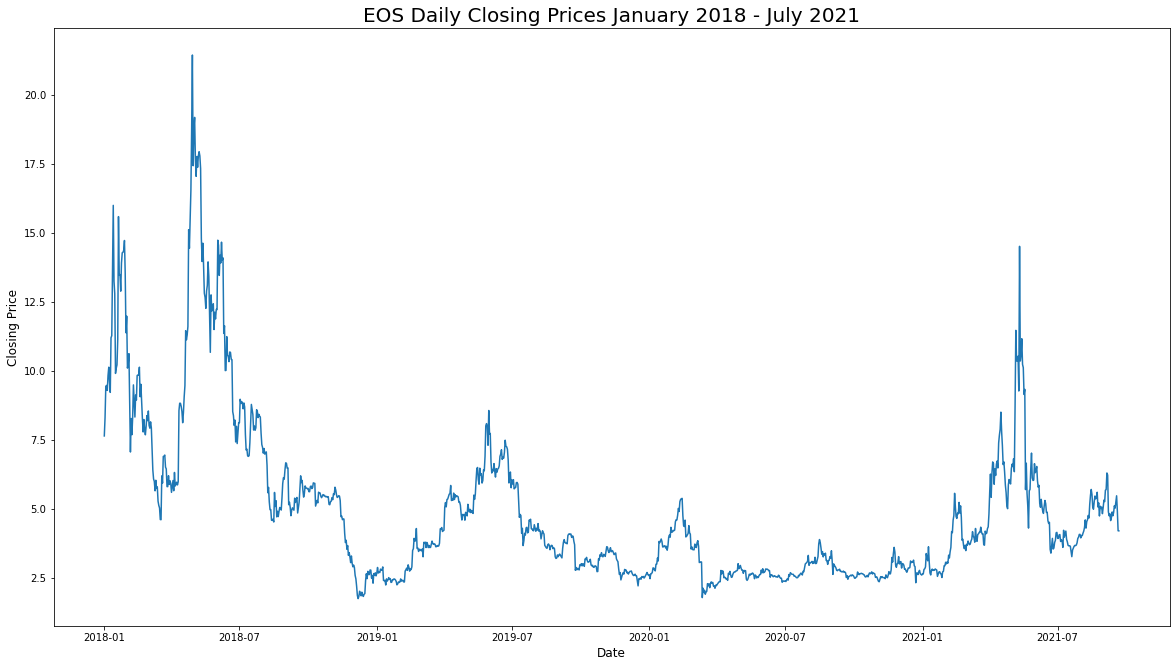

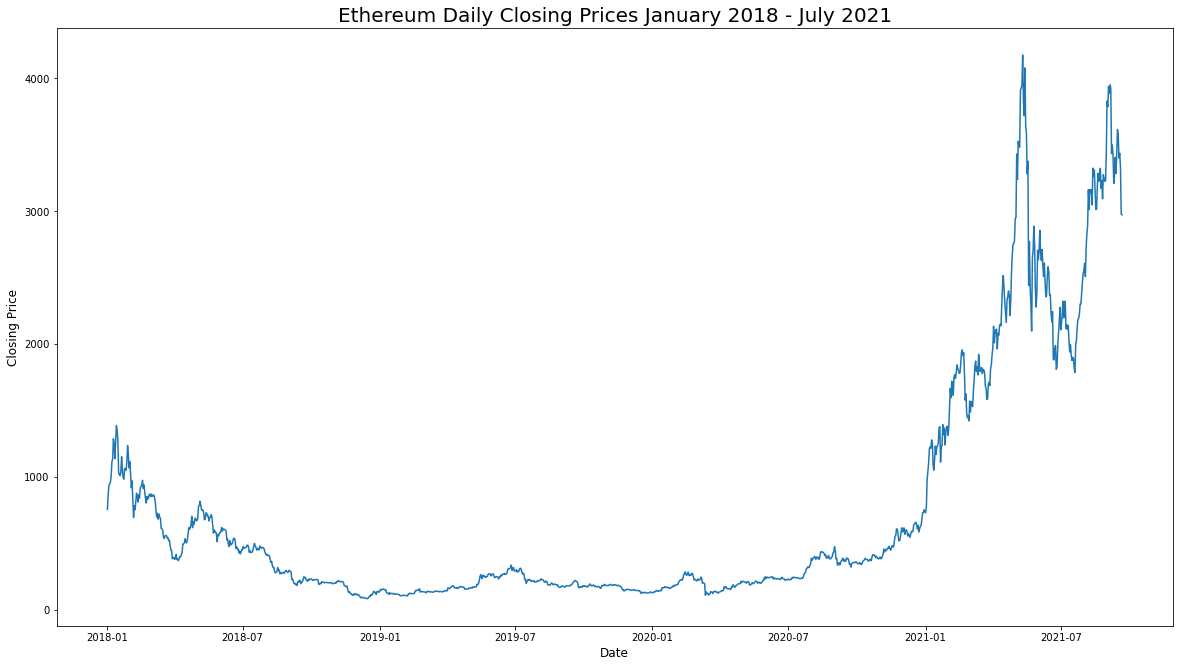

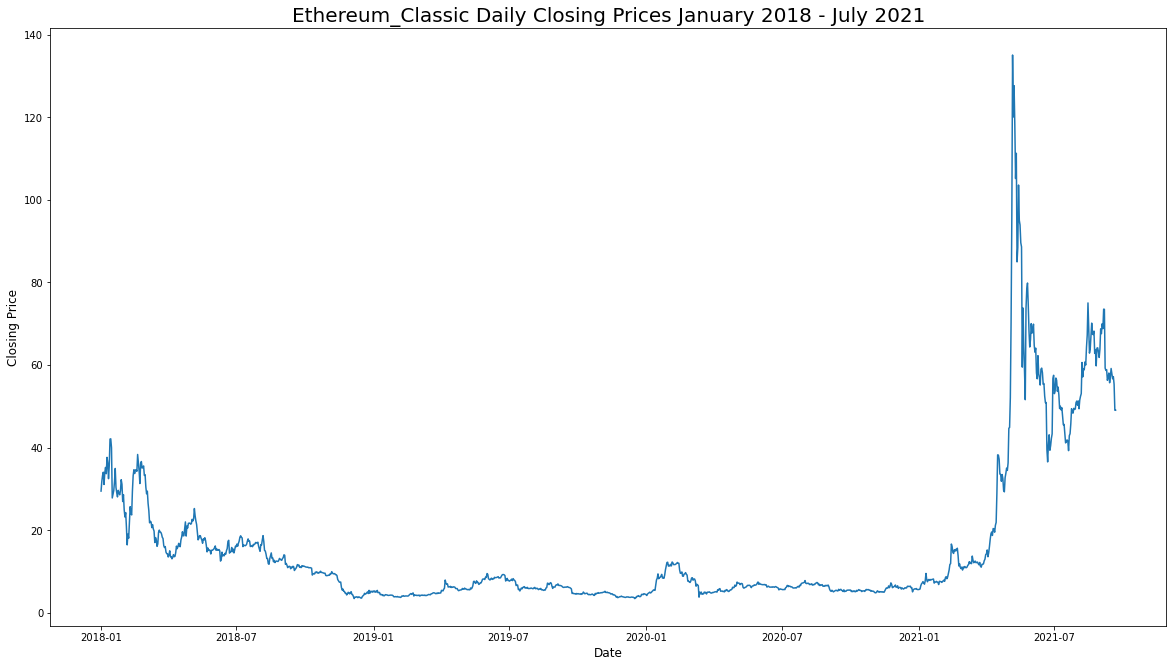

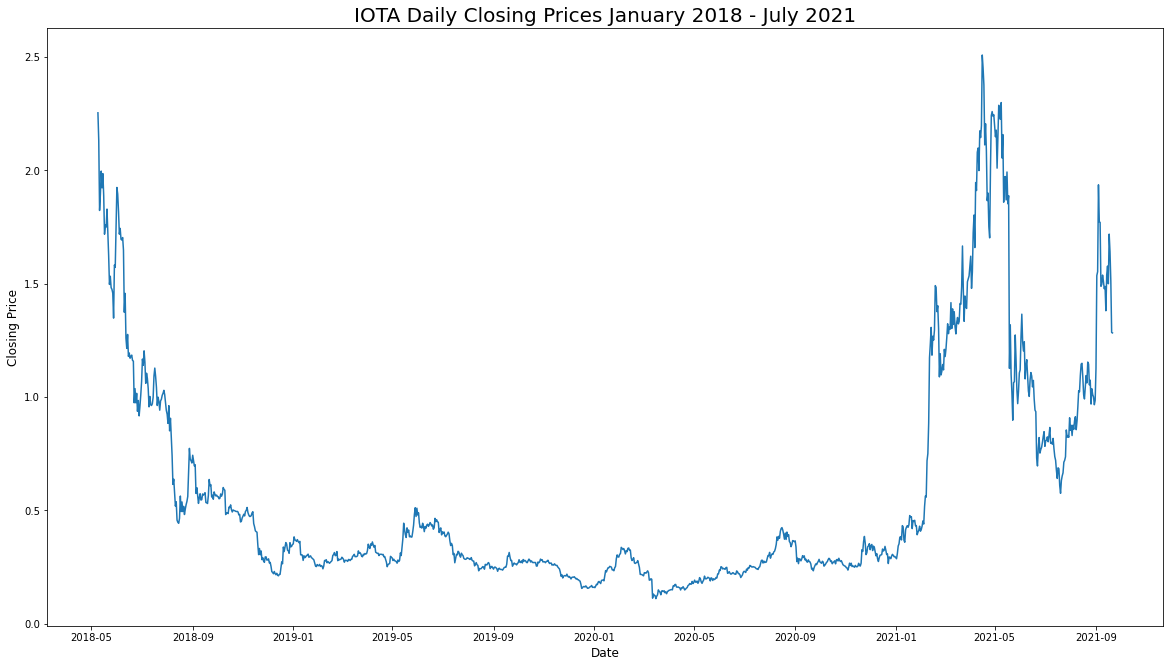

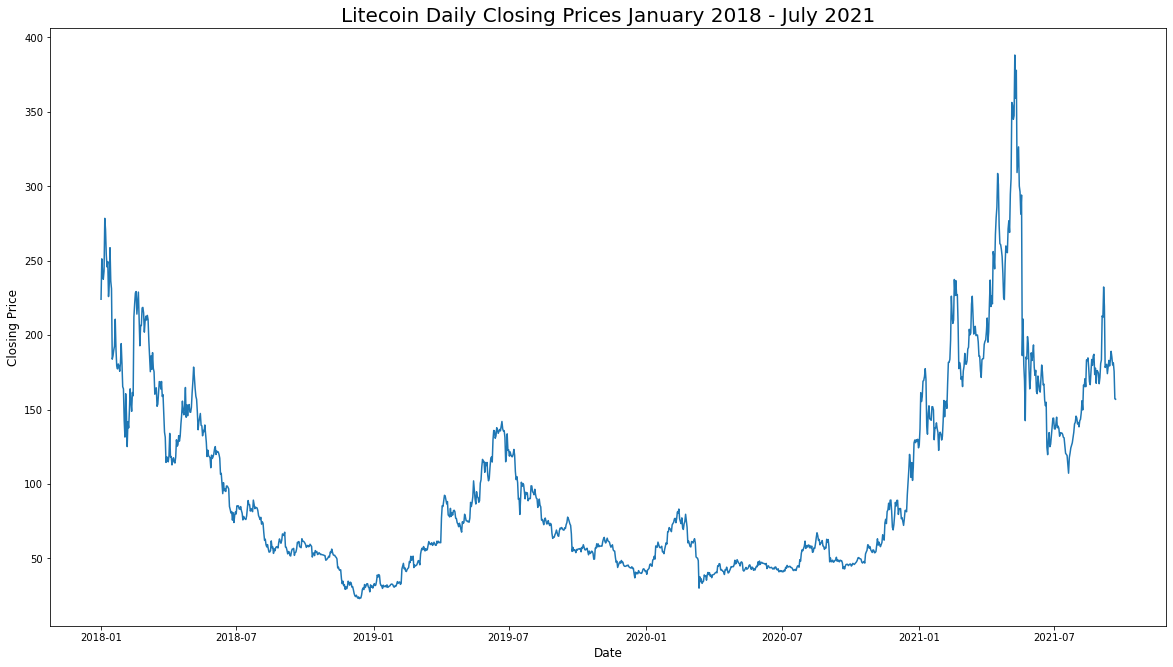

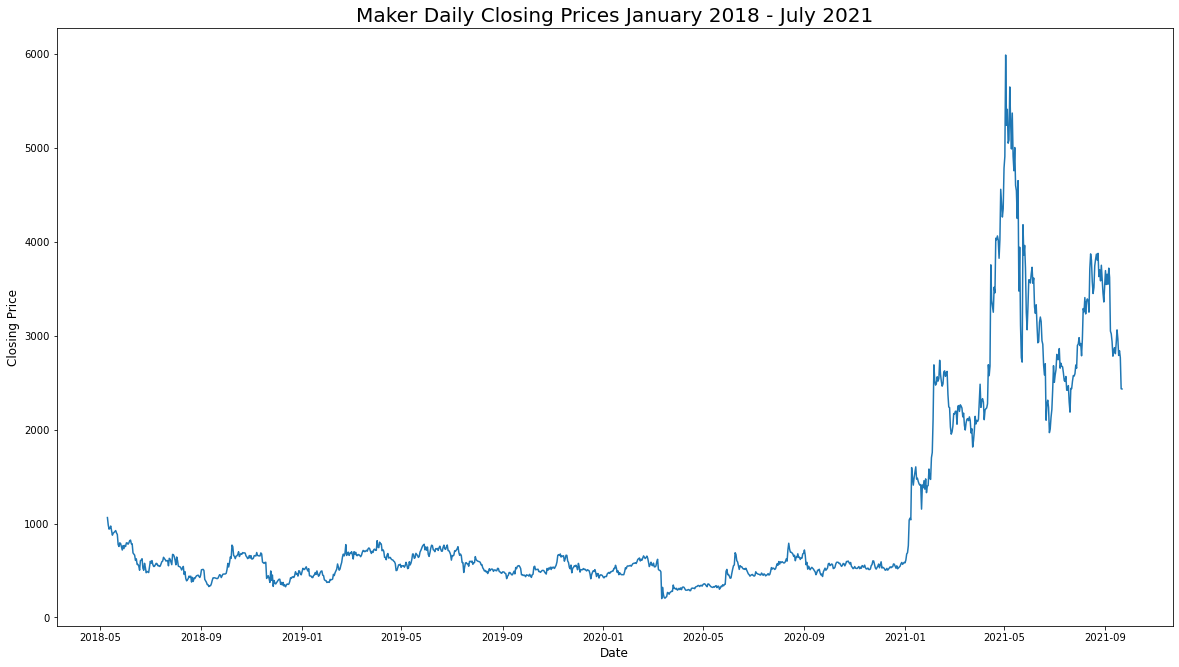

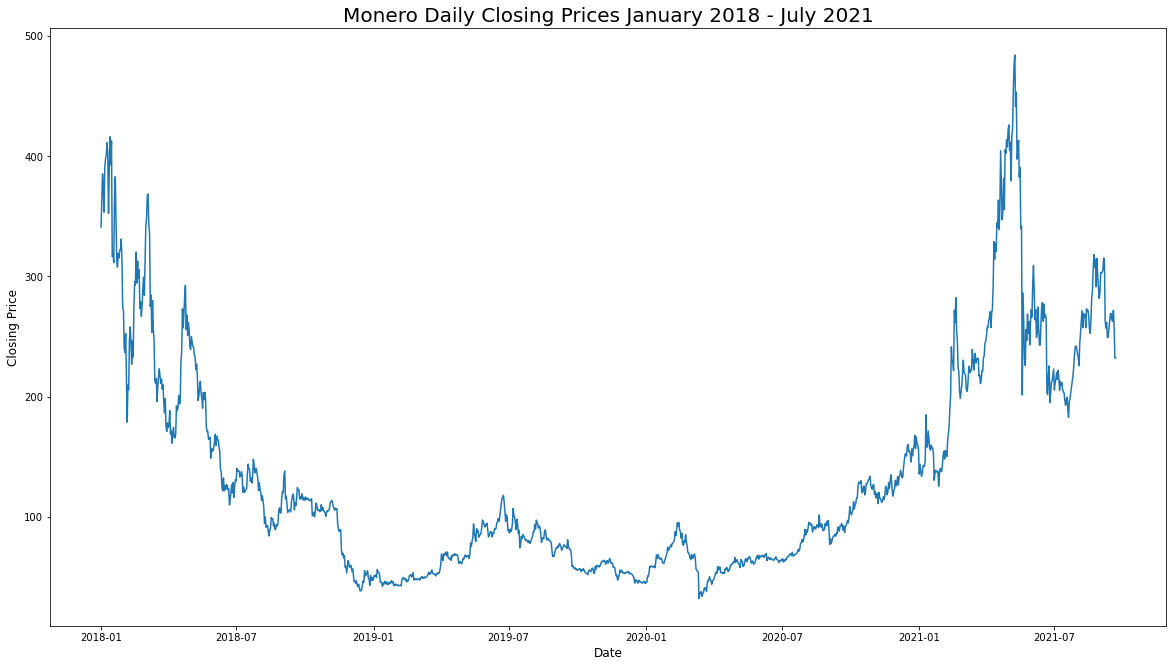

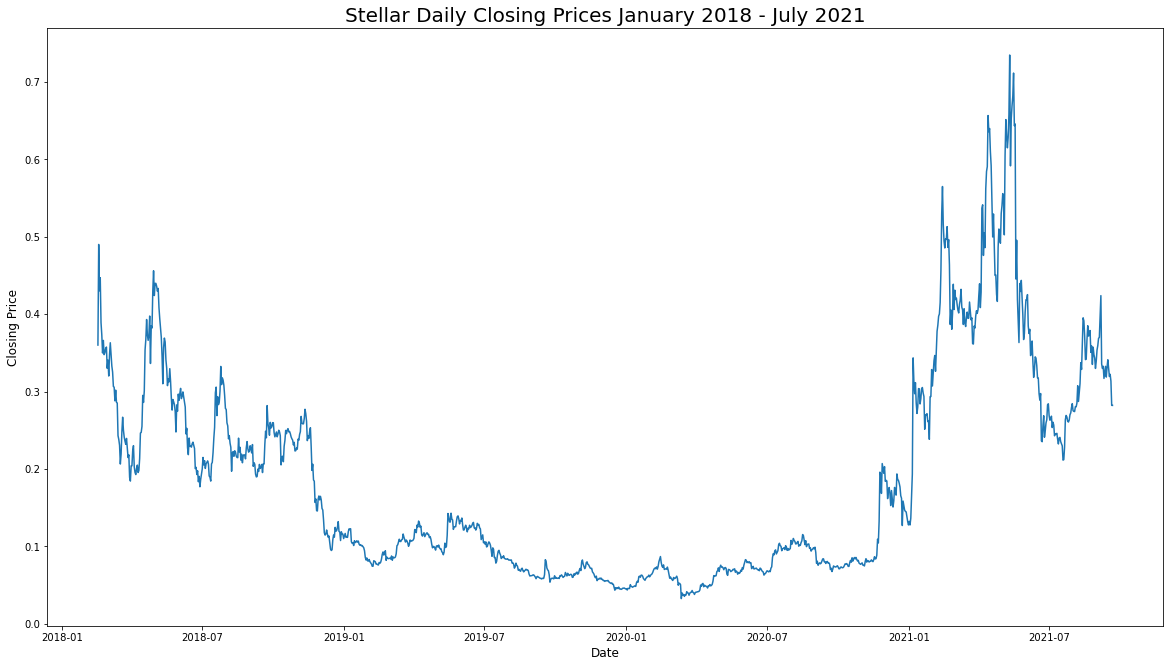

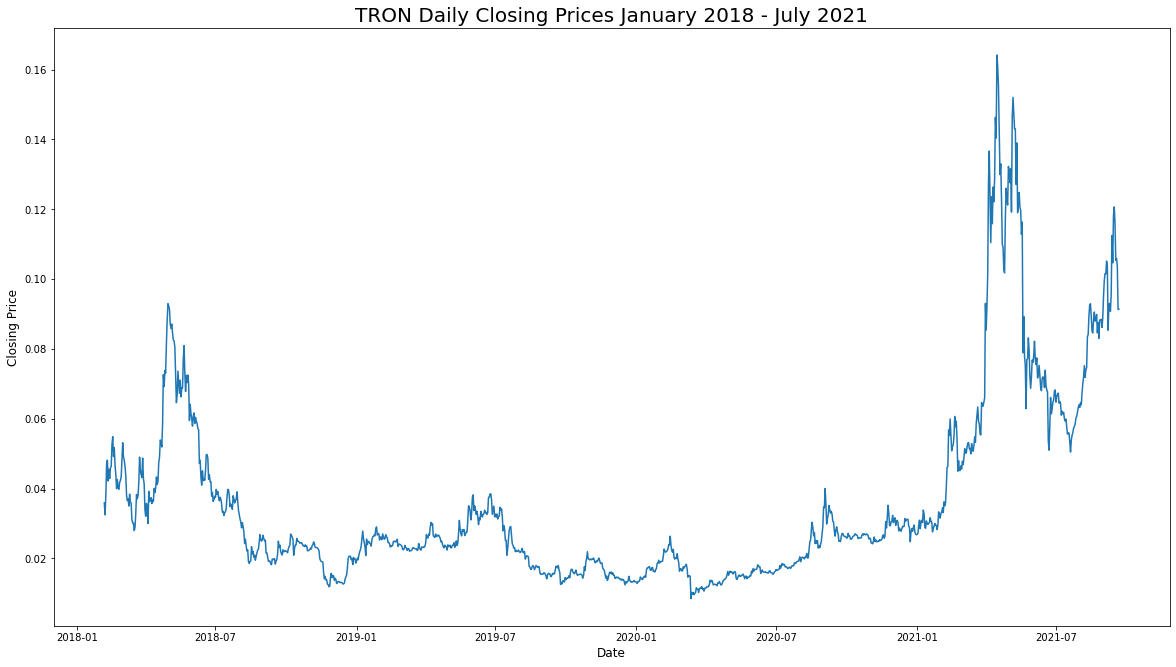

In [24]:
#line graphs for every crypto
daily_chart_maker(str_coins,d_coins)

In [25]:
#function for monthly charts individually
def weekly_chart_maker(list1,list2):
    for i in range(0,len(list1)):
        plt.figure(figsize=(20,11))
        plt.title(f"{list1[i]} Weekly Closing Prices January 2018 - July 2021", fontdict={"fontsize":20})
        sns.lineplot(data=list2[i], x=list2[i].index,y=list2[i]["Close"])
        plt.xlabel(xlabel="Date",fontdict={'fontsize':12})
        plt.ylabel(ylabel="Closing Price",fontdict={'fontsize':12})

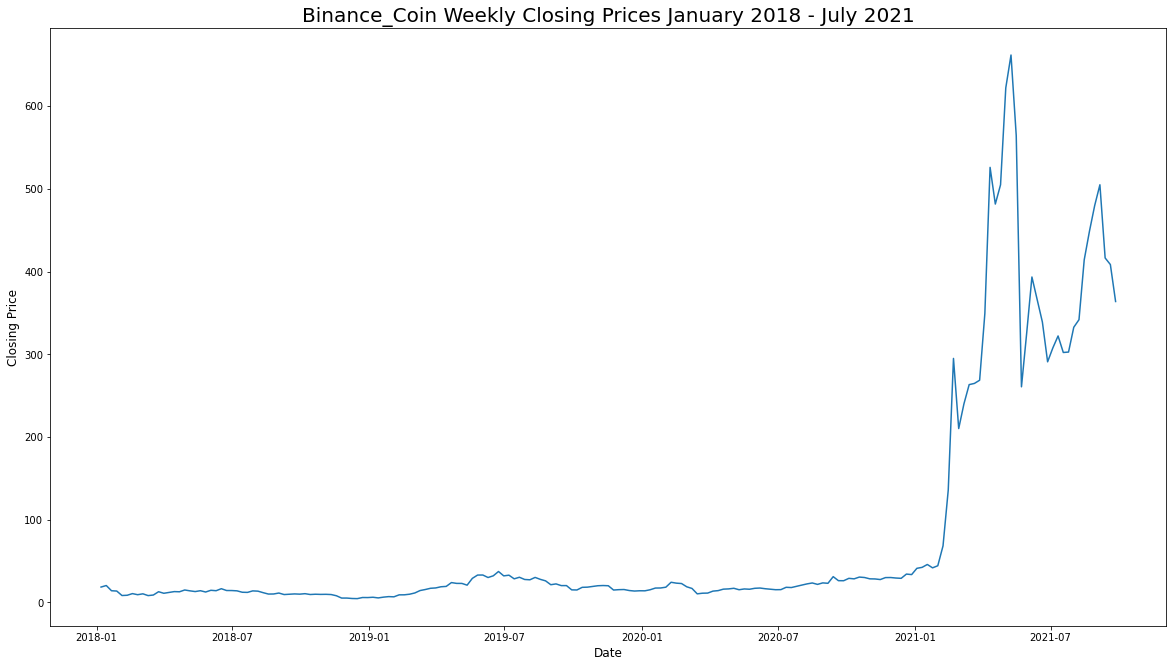

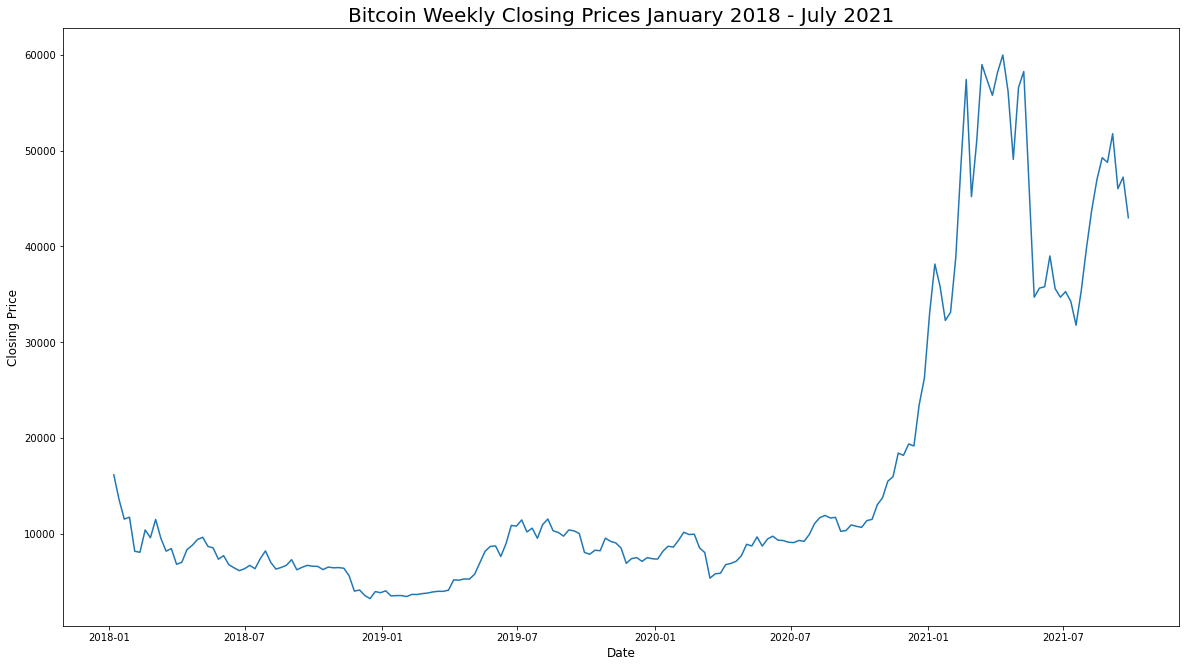

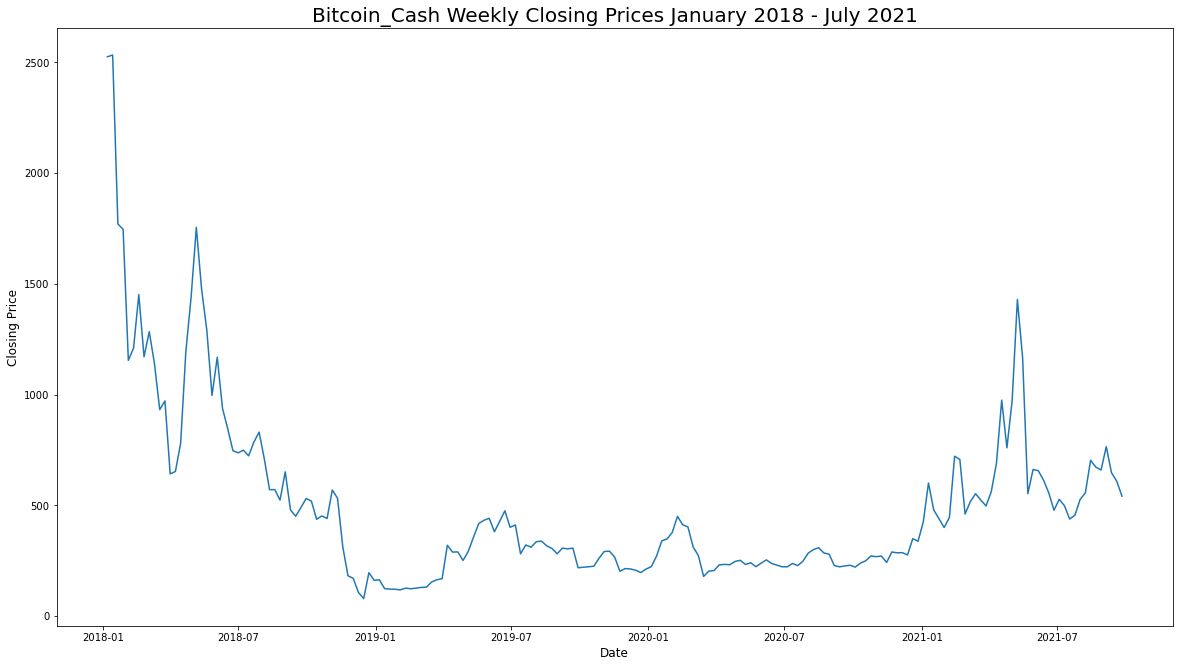

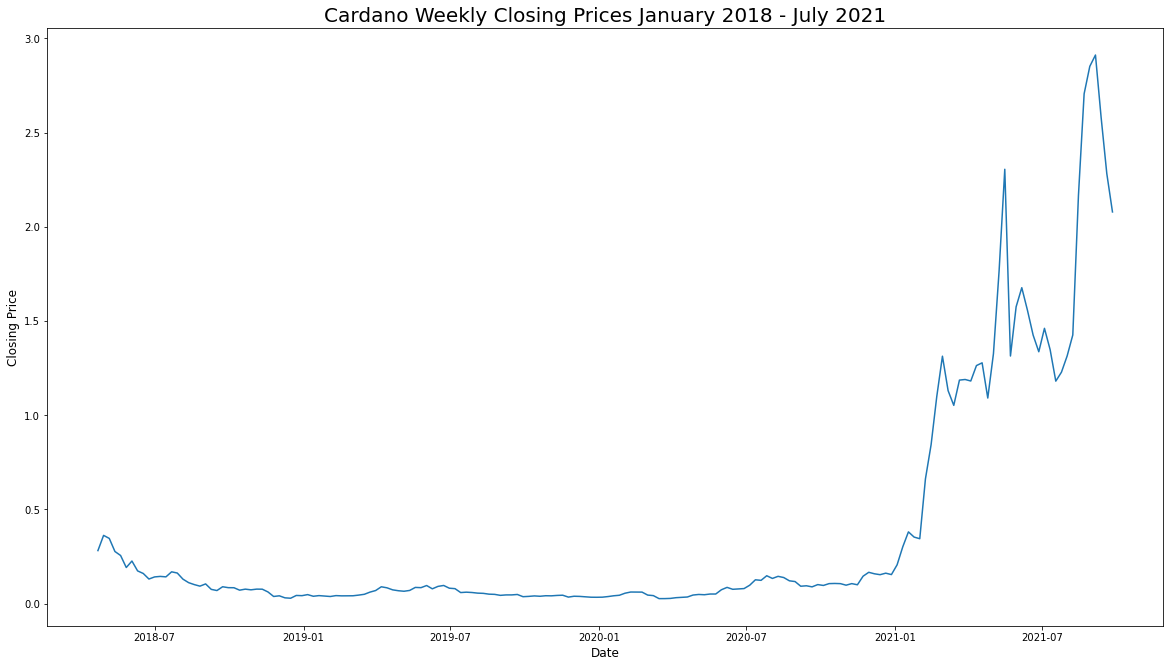

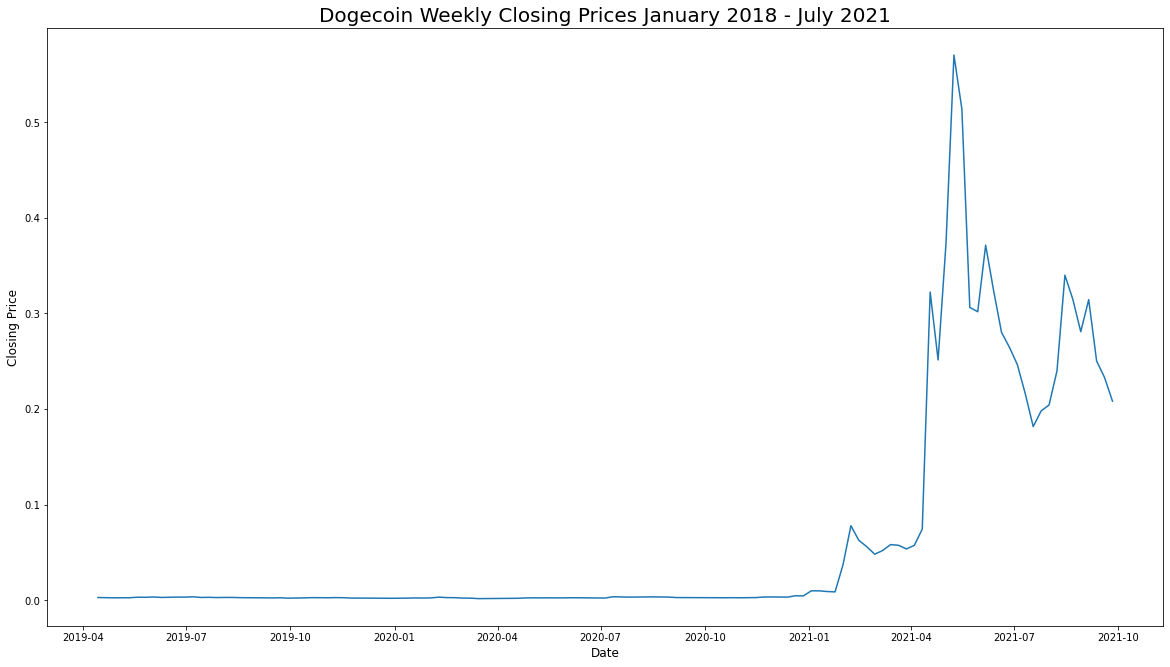

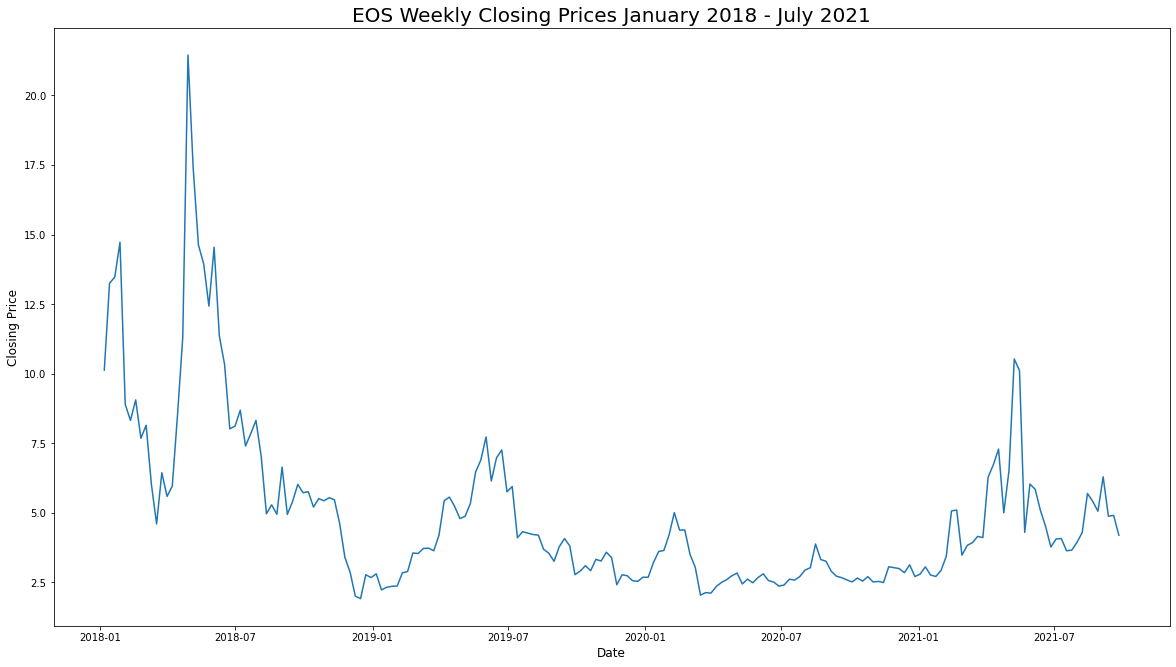

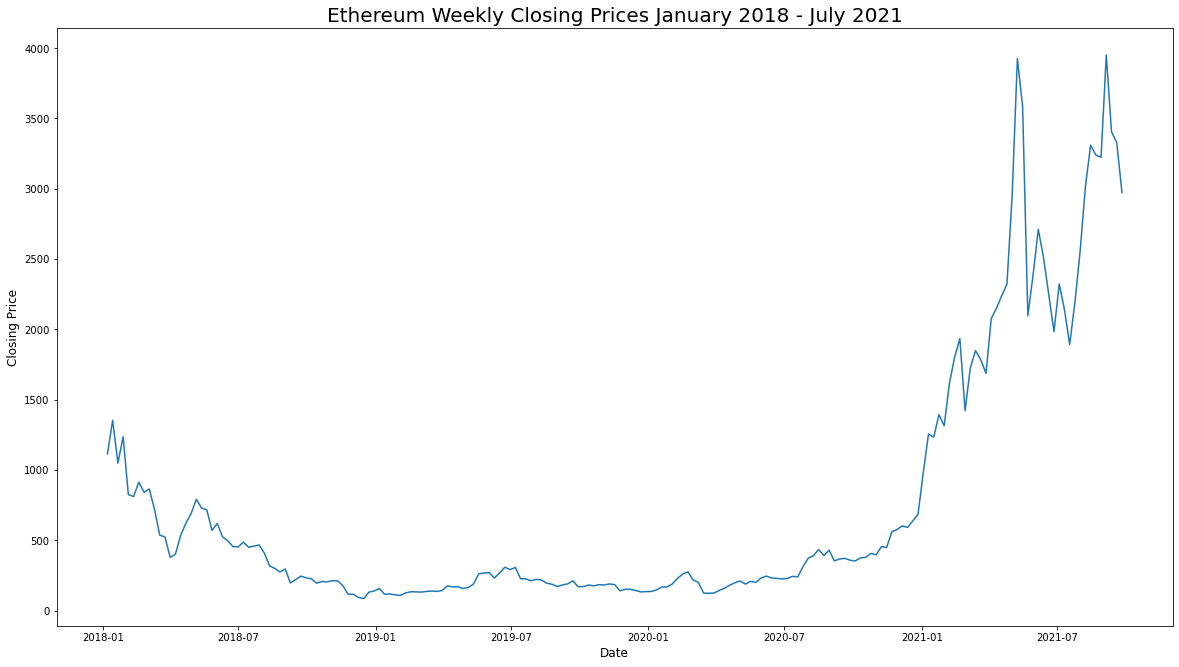

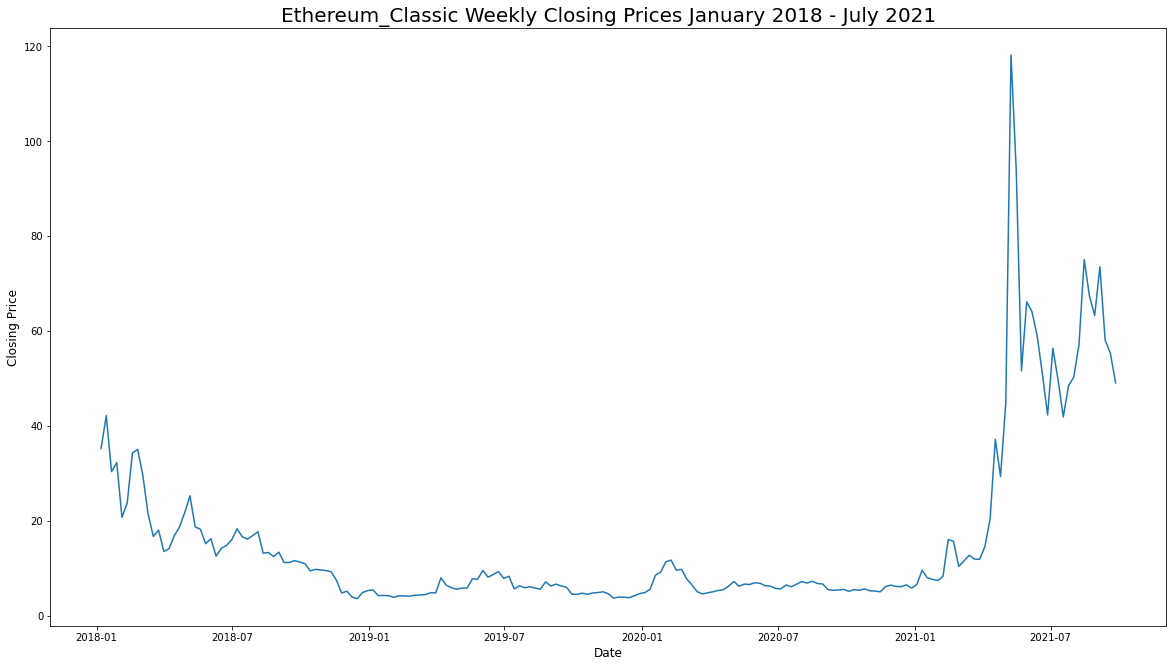

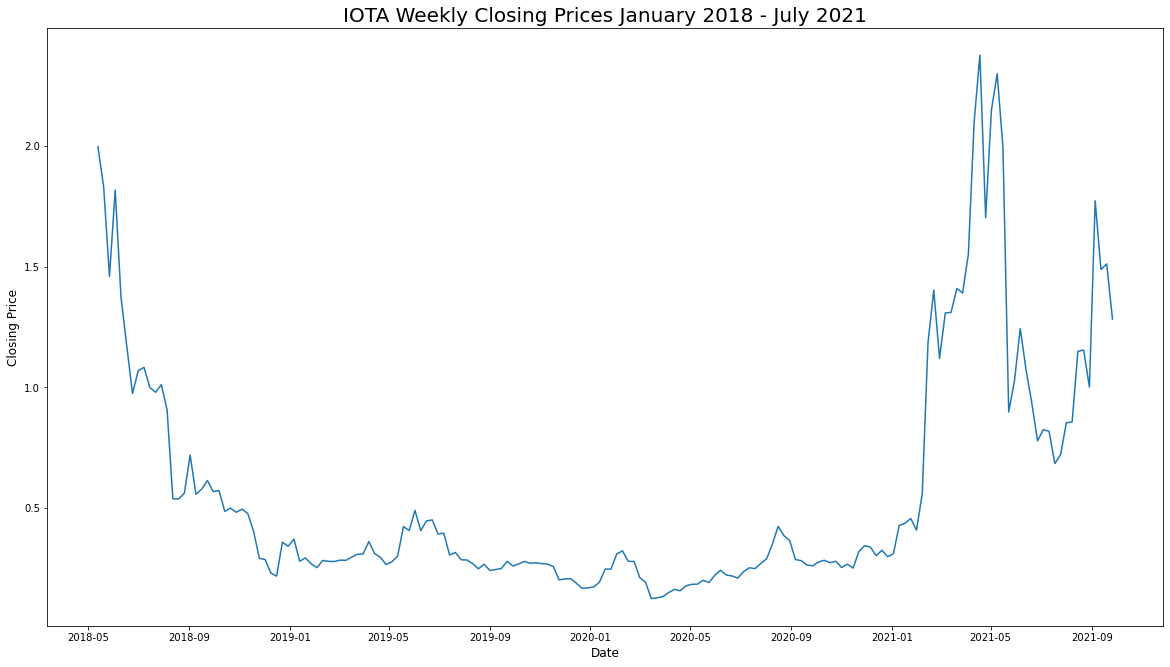

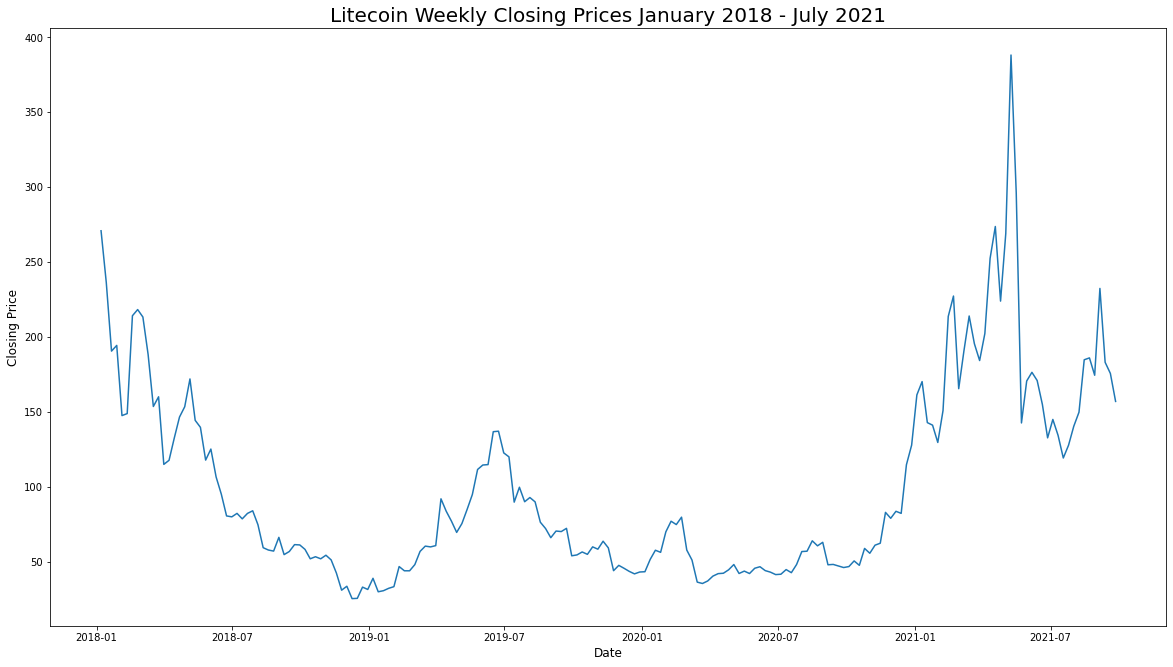

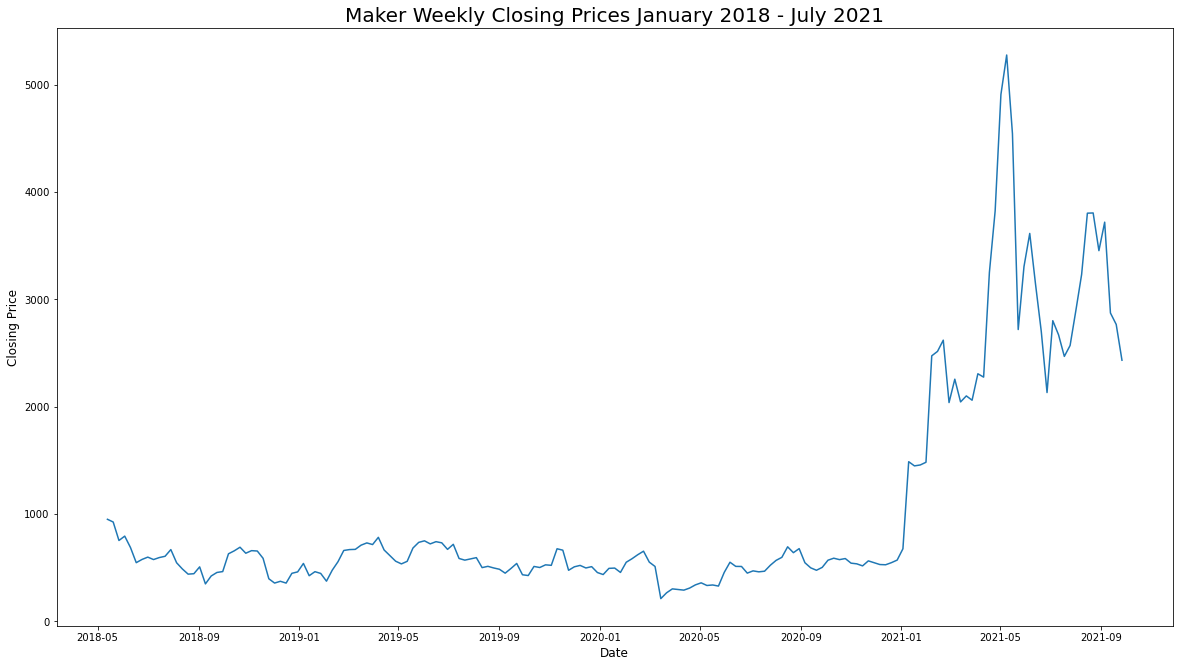

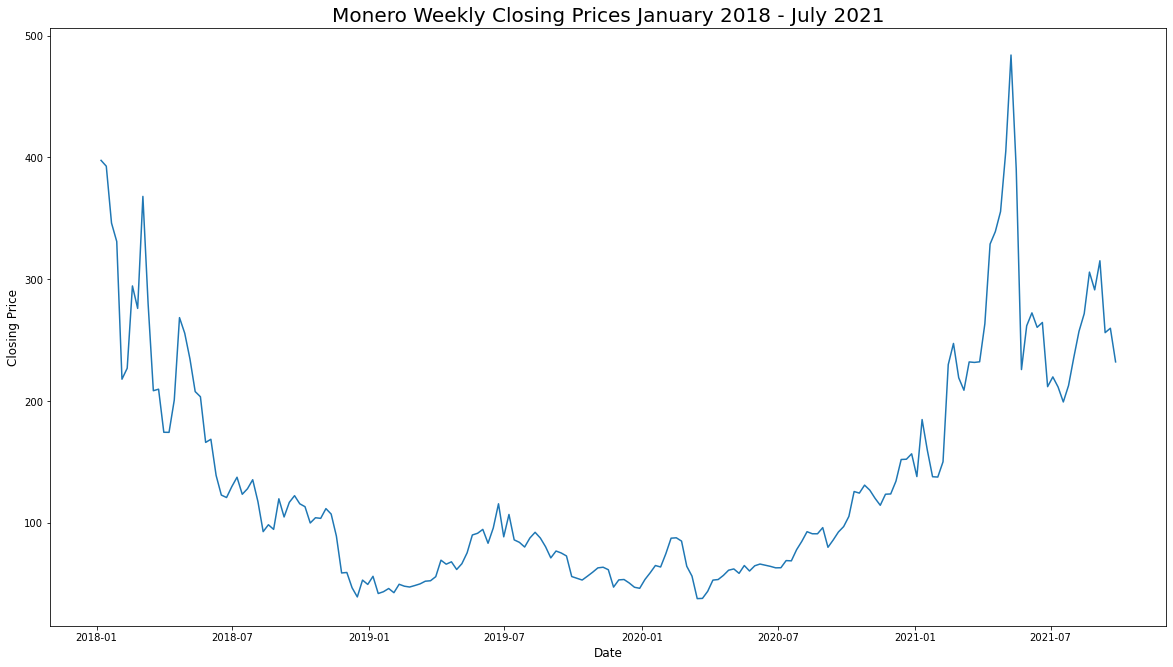

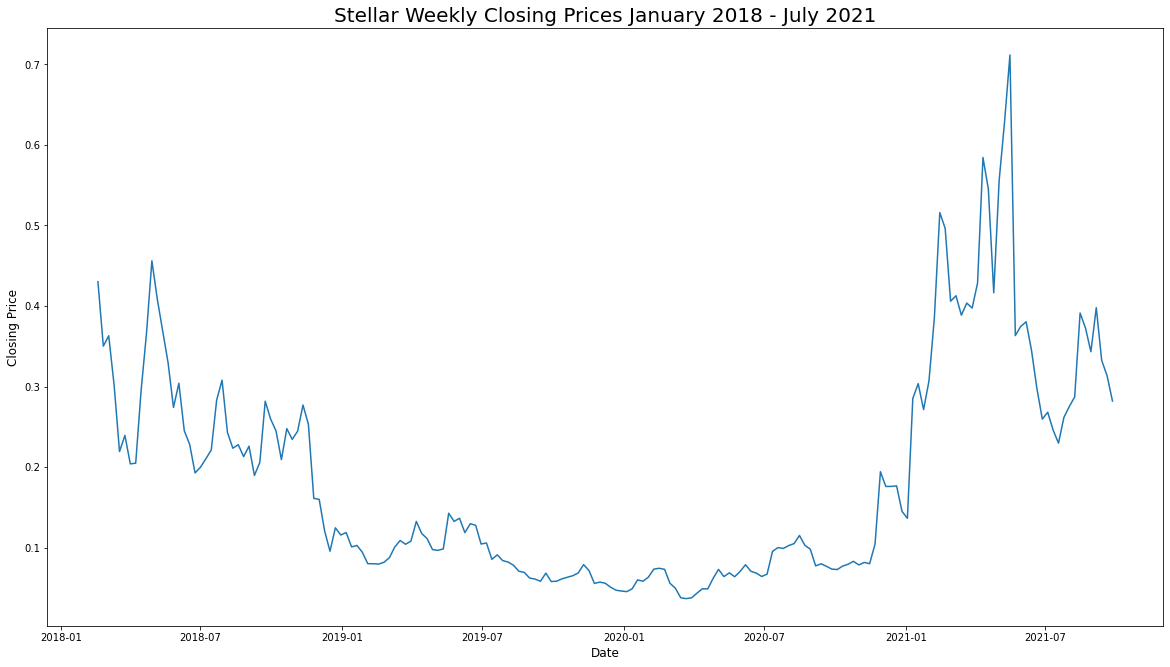

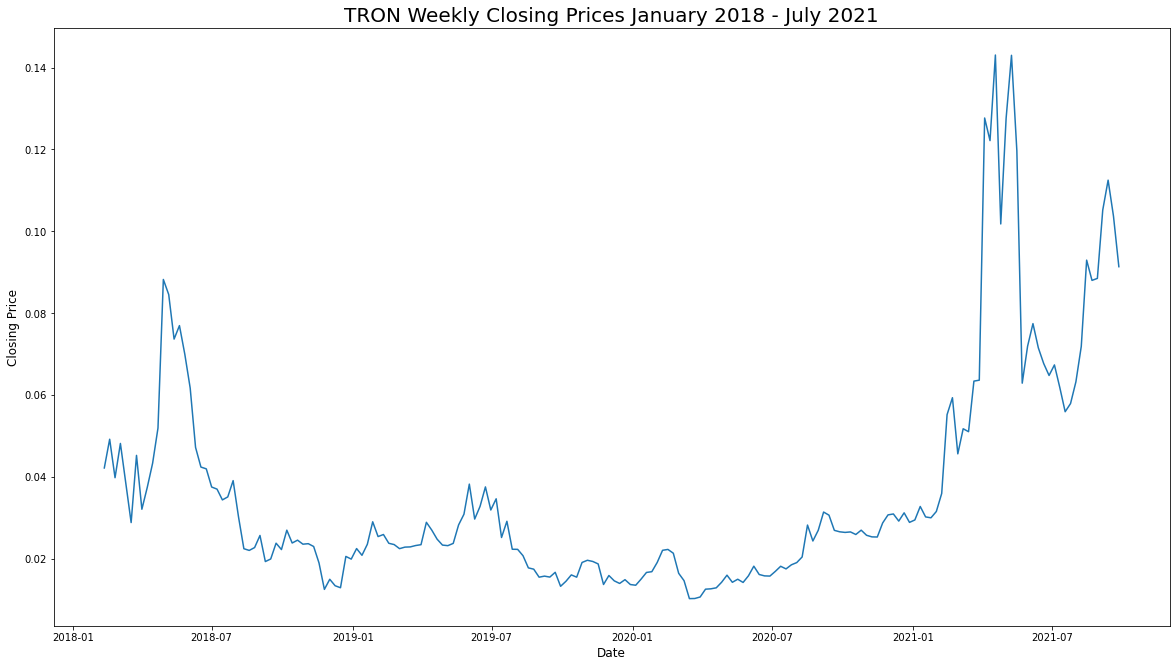

In [26]:
weekly_chart_maker(str_coins,w_coins)

#### Saving all to Data folder for use later *hidden*

In [27]:
train.to_parquet("data/train_cleaned") #parquet to make loading in dataset quicker

In [28]:
#Creating Hourly Parquets to work with
h_binance_coin.to_parquet('data/hourly_Binance_Coin')
h_bitcoin.to_parquet('data/hourly_Bitcoin')
h_bitcoin_cash.to_parquet('data/hourly_Bitcoin_Cash')
h_cardano.to_parquet('data/hourly_Cardano')
h_dogecoin.to_parquet('data/hourly_Dogecoin')
h_eos_io.to_parquet('data/hourly_EOS')
h_ethereum.to_parquet('data/hourly_Ethereum')
h_ethereum_classic.to_parquet('data/hourly_Ethereum_Classic')
h_iota.to_parquet('data/hourly_IOTA')
h_litecoin.to_parquet('data/hourly_Litecoin')
h_maker.to_parquet('data/hourly_Maker')
h_monero.to_parquet('data/hourly_Monero')
h_stellar.to_parquet('data/hourly_Stellar')
h_tron.to_parquet('data/hourly_TRON')
#Creating Daily Parquets to work with
d_binance_coin.to_parquet('data/daily_Binance_Coin')
d_bitcoin.to_parquet('data/daily_Bitcoin')
d_bitcoin_cash.to_parquet('data/daily_Bitcoin_Cash')
d_cardano.to_parquet('data/daily_Cardano')
d_dogecoin.to_parquet('data/daily_Dogecoin')
d_eos_io.to_parquet('data/daily_EOS')
d_ethereum.to_parquet('data/daily_Ethereum')
d_ethereum_classic.to_parquet('data/daily_Ethereum_Classic')
d_iota.to_parquet('data/daily_IOTA')
d_litecoin.to_parquet('data/daily_Litecoin')
d_maker.to_parquet('data/daily_Maker')
d_monero.to_parquet('data/daily_Monero')
d_stellar.to_parquet('data/daily_Stellar')
d_tron.to_parquet('data/daily_TRON')
#Creating weekly Parquets to work with
w_binance_coin.to_parquet('data/weekly_Binance_Coin')
w_bitcoin.to_parquet('data/weekly_Bitcoin')
w_bitcoin_cash.to_parquet('data/weekly_Bitcoin_Cash')
w_cardano.to_parquet('data/weekly_Cardano.')
w_dogecoin.to_parquet('data/weekly_Dogecoin.')
w_eos_io.to_parquet('data/weekly_EOS.')
w_ethereum.to_parquet('data/weekly_Ethereum.')
w_ethereum_classic.to_parquet('data/weekly_Ethereum_Classic.')
w_iota.to_parquet('data/weekly_IOTA.')
w_litecoin.to_parquet('data/weekly_Litecoin.')
w_maker.to_parquet('data/weekly_Maker.')
w_monero.to_parquet('data/weekly_Monero.')
w_stellar.to_parquet('data/weekly_Stellar.')
w_tron.to_parquet('data/weekly_TRON')

In [29]:
df=pd.read_parquet("data/train_cleaned")

In [30]:
files=os.listdir('./data')

In [31]:
#checking files to speed up read in process
files

['.ipynb_checkpoints',
 'daily_Binance_Coin',
 'daily_Bitcoin',
 'daily_Bitcoin_Cash',
 'daily_Cardano',
 'daily_Dogecoin',
 'daily_EOS',
 'daily_Ethereum',
 'daily_Ethereum_Classic',
 'daily_IOTA',
 'daily_Litecoin',
 'daily_Maker',
 'daily_Monero',
 'daily_Stellar',
 'daily_TRON',
 'hourly_Binance_Coin',
 'hourly_Bitcoin',
 'hourly_Bitcoin_Cash',
 'hourly_Cardano',
 'hourly_Dogecoin',
 'hourly_EOS',
 'hourly_Ethereum',
 'hourly_Ethereum_Classic',
 'hourly_IOTA',
 'hourly_Litecoin',
 'hourly_Maker',
 'hourly_Monero',
 'hourly_Stellar',
 'hourly_TRON',
 'train_cleaned',
 'weekly_Binance_Coin',
 'weekly_Bitcoin',
 'weekly_Bitcoin_Cash',
 'weekly_Cardano',
 'weekly_Dogecoin',
 'weekly_EOS',
 'weekly_Ethereum',
 'weekly_Ethereum_Classic',
 'weekly_IOTA',
 'weekly_Litecoin',
 'weekly_Maker',
 'weekly_Monero',
 'weekly_Stellar',
 'weekly_TRON']

In [32]:
files=['daily_Binance_Coin',
 'daily_Bitcoin',
 'daily_Bitcoin_Cash',
 'daily_Cardano',
 'daily_Dogecoin',
 'daily_EOS',
 'daily_Ethereum',
 'daily_Ethereum_Classic',
 'daily_Iota',
 'daily_Litecoin',
 'daily_Maker',
 'daily_Monero',
 'daily_Stellar',
 'daily_Tron',
 'hourly_Binance_Coin',
 'hourly_Bitcoin',
 'hourly_Bitcoin_Cash',
 'hourly_Cardano',
 'hourly_Dogecoin',
 'hourly_EOS',
 'hourly_Ethereum',
 'hourly_Ethereum_Classic',
 'hourly_Iota',
 'hourly_Litecoin',
 'hourly_Maker',
 'hourly_Monero',
 'hourly_Stellar',
 'hourly_Tron',
 'weekly_Binance_Coin',
 'weekly_Bitcoin',
 'weekly_Bitcoin_Cash',
 'weekly_Cardano',
 'weekly_Dogecoin',
 'weekly_EOS',
 'weekly_Ethereum',
 'weekly_Ethereum_Classic',
 'weekly_Iota',
 'weekly_Litecoin',
 'weekly_Maker',
 'weekly_Monero',
 'weekly_Stellar',
 'weekly_Tron']

###### printing out read_parquet commands to save time and copy and paste.

In [33]:
#list comp to print out commands
[print(f"pd.read_parquet('./data/{i}')") for i in files]

pd.read_parquet('./data/daily_Binance_Coin')
pd.read_parquet('./data/daily_Bitcoin')
pd.read_parquet('./data/daily_Bitcoin_Cash')
pd.read_parquet('./data/daily_Cardano')
pd.read_parquet('./data/daily_Dogecoin')
pd.read_parquet('./data/daily_EOS')
pd.read_parquet('./data/daily_Ethereum')
pd.read_parquet('./data/daily_Ethereum_Classic')
pd.read_parquet('./data/daily_Iota')
pd.read_parquet('./data/daily_Litecoin')
pd.read_parquet('./data/daily_Maker')
pd.read_parquet('./data/daily_Monero')
pd.read_parquet('./data/daily_Stellar')
pd.read_parquet('./data/daily_Tron')
pd.read_parquet('./data/hourly_Binance_Coin')
pd.read_parquet('./data/hourly_Bitcoin')
pd.read_parquet('./data/hourly_Bitcoin_Cash')
pd.read_parquet('./data/hourly_Cardano')
pd.read_parquet('./data/hourly_Dogecoin')
pd.read_parquet('./data/hourly_EOS')
pd.read_parquet('./data/hourly_Ethereum')
pd.read_parquet('./data/hourly_Ethereum_Classic')
pd.read_parquet('./data/hourly_Iota')
pd.read_parquet('./data/hourly_Litecoin')
pd.rea

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [34]:
#very long but all files were read in with the correct order in mind.
daily_Binance_Coin,daily_Bitcoin,daily_Bitcoin_Cash,daily_Cardano,daily_Dogecoin,daily_EOS,daily_Ethereum,daily_Ethereum_Classic,daily_IOTA,daily_Litecoin,daily_Maker,daily_Monero,daily_Stellar,daily_TRON,hourly_Binance_Coin,hourly_Bitcoin,hourly_Bitcoin_Cash,hourly_Cardano,hourly_Dogecoin,hourly_EOS,hourly_Ethereum,hourly_Ethereum_Classic,hourly_IOTA,hourly_Litecoin,hourly_Maker,hourly_Monero,hourly_Stellar,hourly_TRON,weekly_Binance_Coin,weekly_Bitcoin,weekly_Bitcoin_Cash,weekly_Cardano,weekly_Dogecoin,weekly_EOS,weekly_Ethereum,weekly_Ethereum_Classic,weekly_IOTA,weekly_Litecoin,weekly_Maker,weekly_Monero,weekly_Stellar,weekly_TRON=pd.read_parquet('./data/daily_Binance_Coin'),pd.read_parquet('./data/daily_Bitcoin'),pd.read_parquet('./data/daily_Bitcoin_Cash'),pd.read_parquet('./data/daily_Cardano'),pd.read_parquet('./data/daily_Dogecoin'),pd.read_parquet('./data/daily_EOS'),pd.read_parquet('./data/daily_Ethereum'),pd.read_parquet('./data/daily_Ethereum_Classic'),pd.read_parquet('./data/daily_Iota'),pd.read_parquet('./data/daily_Litecoin'),pd.read_parquet('./data/daily_Maker'),pd.read_parquet('./data/daily_Monero'),pd.read_parquet('./data/daily_Stellar'),pd.read_parquet('./data/daily_Tron'),pd.read_parquet('./data/hourly_Binance_Coin'),pd.read_parquet('./data/hourly_Bitcoin'),pd.read_parquet('./data/hourly_Bitcoin_Cash'),pd.read_parquet('./data/hourly_Cardano'),pd.read_parquet('./data/hourly_Dogecoin'),pd.read_parquet('./data/hourly_EOS'),pd.read_parquet('./data/hourly_Ethereum'),pd.read_parquet('./data/hourly_Ethereum_Classic'),pd.read_parquet('./data/hourly_Iota'),pd.read_parquet('./data/hourly_Litecoin'),pd.read_parquet('./data/hourly_Maker'),pd.read_parquet('./data/hourly_Monero'),pd.read_parquet('./data/hourly_Stellar'),pd.read_parquet('./data/hourly_Tron'),pd.read_parquet('./data/weekly_Binance_Coin'),pd.read_parquet('./data/weekly_Bitcoin'),pd.read_parquet('./data/weekly_Bitcoin_Cash'),pd.read_parquet('./data/weekly_Cardano'),pd.read_parquet('./data/weekly_Dogecoin'),pd.read_parquet('./data/weekly_EOS'),pd.read_parquet('./data/weekly_Ethereum'),pd.read_parquet('./data/weekly_Ethereum_Classic'),pd.read_parquet('./data/weekly_Iota'),pd.read_parquet('./data/weekly_Litecoin'),pd.read_parquet('./data/weekly_Maker'),pd.read_parquet('./data/weekly_Monero'),pd.read_parquet('./data/weekly_Stellar'),pd.read_parquet('./data/weekly_Tron')

In [35]:
# list of strings to make iterating easier
df_string_list=['daily_Binance_Coin','daily_Bitcoin','daily_Bitcoin_Cash','daily_Cardano','daily_Dogecoin','daily_EOS','daily_Ethereum','daily_Ethereum_Classic','daily_IOTA','daily_Litecoin','daily_Maker','daily_Monero','daily_Stellar','daily_TRON','hourly_Binance_Coin','hourly_Bitcoin','hourly_Bitcoin_Cash','hourly_Cardano','hourly_Dogecoin','hourly_EOS','hourly_Ethereum','hourly_Ethereum_Classic','hourly_IOTA','hourly_Litecoin','hourly_Maker','hourly_Monero','hourly_Stellar','hourly_TRON','weekly_Binance_Coin','weekly_Bitcoin','weekly_Bitcoin_Cash','weekly_Cardano','weekly_Dogecoin','weekly_EOS','weekly_Ethereum','weekly_Ethereum_Classic','weekly_IOTA','weekly_Litecoin','weekly_Maker','weekly_Monero','weekly_Stellar','weekly_TRON']

In [36]:
[f"{i} Autocorrelation" for i in df_string_list]

['daily_Binance_Coin Autocorrelation',
 'daily_Bitcoin Autocorrelation',
 'daily_Bitcoin_Cash Autocorrelation',
 'daily_Cardano Autocorrelation',
 'daily_Dogecoin Autocorrelation',
 'daily_EOS Autocorrelation',
 'daily_Ethereum Autocorrelation',
 'daily_Ethereum_Classic Autocorrelation',
 'daily_IOTA Autocorrelation',
 'daily_Litecoin Autocorrelation',
 'daily_Maker Autocorrelation',
 'daily_Monero Autocorrelation',
 'daily_Stellar Autocorrelation',
 'daily_TRON Autocorrelation',
 'hourly_Binance_Coin Autocorrelation',
 'hourly_Bitcoin Autocorrelation',
 'hourly_Bitcoin_Cash Autocorrelation',
 'hourly_Cardano Autocorrelation',
 'hourly_Dogecoin Autocorrelation',
 'hourly_EOS Autocorrelation',
 'hourly_Ethereum Autocorrelation',
 'hourly_Ethereum_Classic Autocorrelation',
 'hourly_IOTA Autocorrelation',
 'hourly_Litecoin Autocorrelation',
 'hourly_Maker Autocorrelation',
 'hourly_Monero Autocorrelation',
 'hourly_Stellar Autocorrelation',
 'hourly_TRON Autocorrelation',
 'weekly_Binance

C:\Users\adoni\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


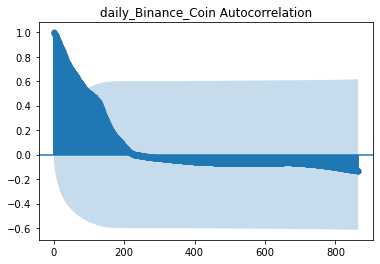

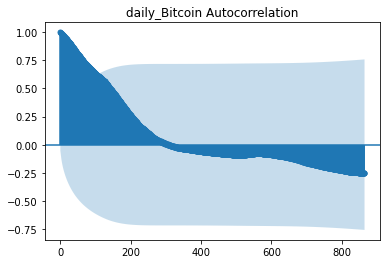

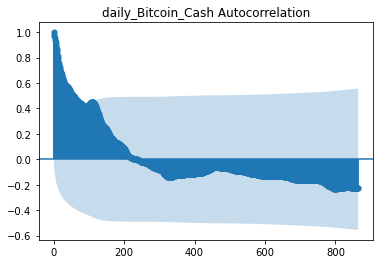

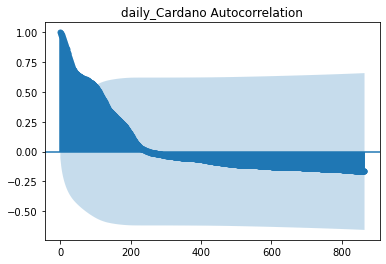

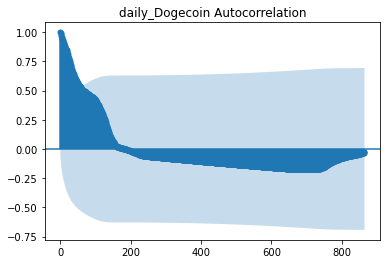

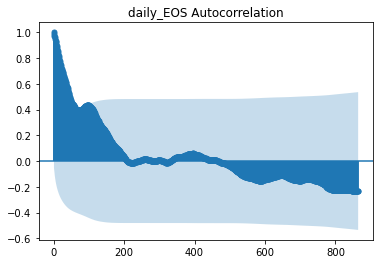

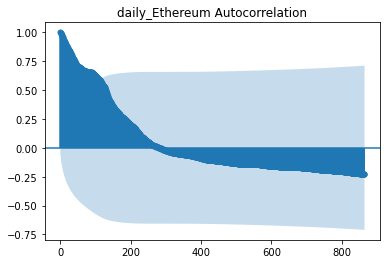

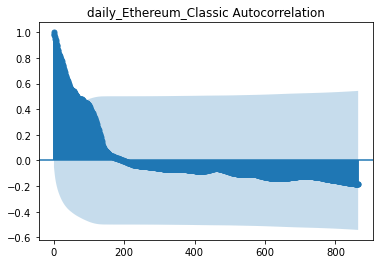

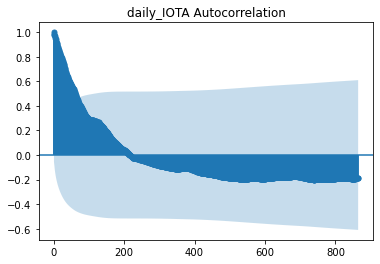

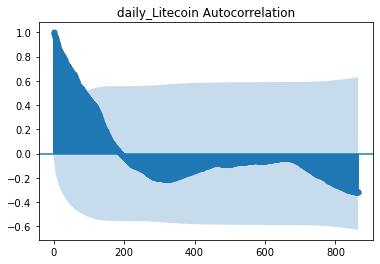

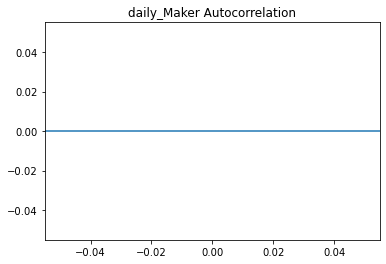

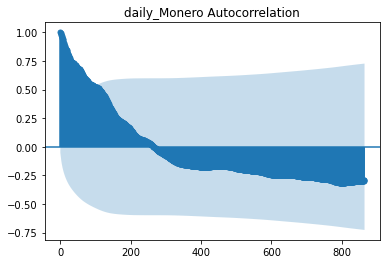

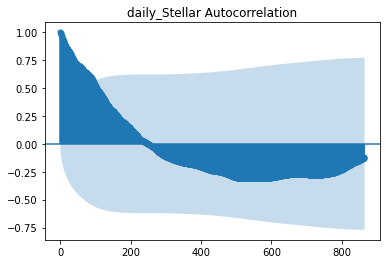

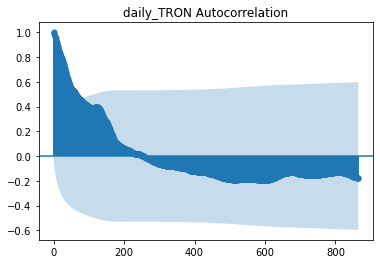

In [37]:
#Daily Autocorrelation
plot_acf(daily_Binance_Coin['Close'], lags=864,title='daily_Binance_Coin Autocorrelation')
plot_acf(daily_Bitcoin['Close'], lags=864,title='daily_Bitcoin Autocorrelation')
plot_acf(daily_Bitcoin_Cash['Close'], lags=864,title='daily_Bitcoin_Cash Autocorrelation')
plot_acf(daily_Cardano['Close'], lags=864,title='daily_Cardano Autocorrelation')
plot_acf(daily_Dogecoin['Close'], lags=864,title='daily_Dogecoin Autocorrelation')
plot_acf(daily_EOS['Close'], lags=864,title='daily_EOS Autocorrelation')
plot_acf(daily_Ethereum['Close'], lags=864,title='daily_Ethereum Autocorrelation')
plot_acf(daily_Ethereum_Classic['Close'], lags=864,title='daily_Ethereum_Classic Autocorrelation')
plot_acf(daily_IOTA['Close'], lags=864,title='daily_IOTA Autocorrelation')
plot_acf(daily_Litecoin['Close'], lags=864,title='daily_Litecoin Autocorrelation')
plot_acf(daily_Maker['Close'], lags=864,title='daily_Maker Autocorrelation') #Maker function had issues
plot_acf(daily_Monero['Close'], lags=864,title='daily_Monero Autocorrelation')
plot_acf(daily_Stellar['Close'], lags=864,title='daily_Stellar Autocorrelation')
plot_acf(daily_TRON['Close'], lags=864,title='daily_TRON Autocorrelation');

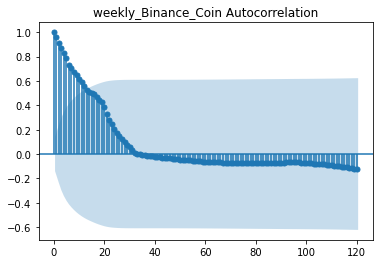

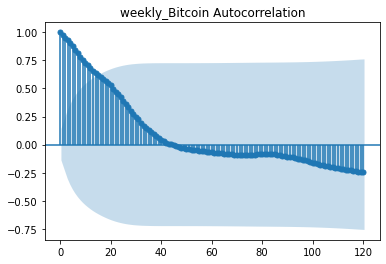

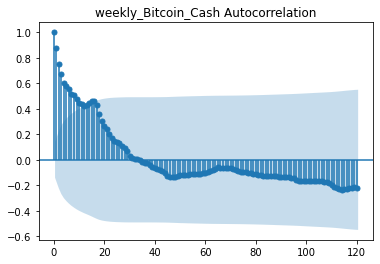

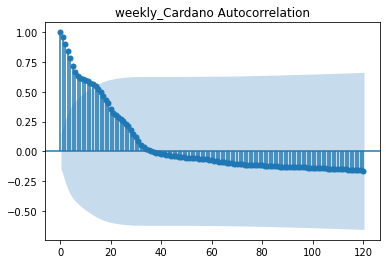

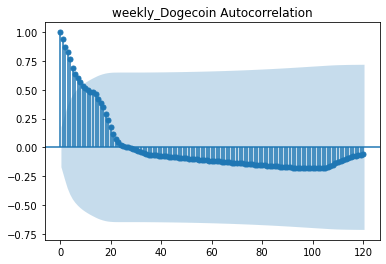

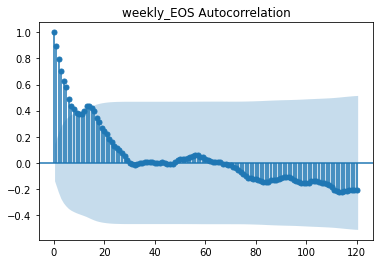

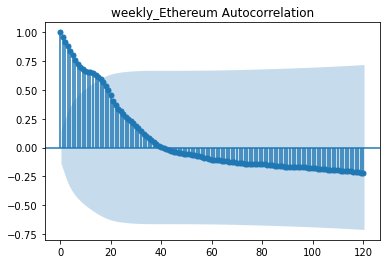

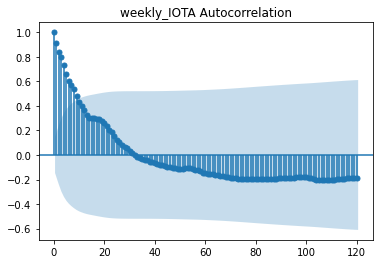

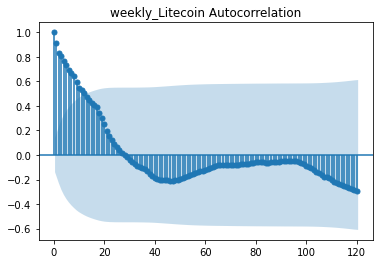

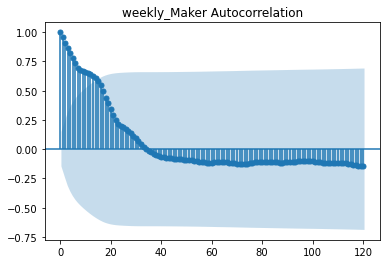

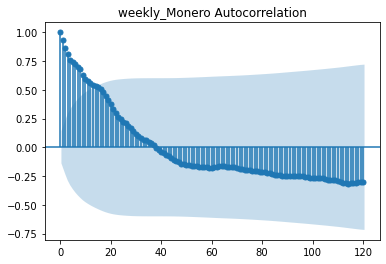

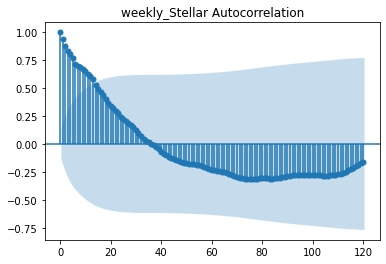

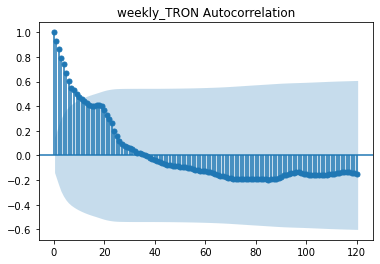

In [38]:
#Weekly Autocorrelation
plot_acf(weekly_Binance_Coin['Close'], lags=120,title='weekly_Binance_Coin Autocorrelation')
plot_acf(weekly_Bitcoin['Close'], lags=120,title='weekly_Bitcoin Autocorrelation')
plot_acf(weekly_Bitcoin_Cash['Close'], lags=120 ,title='weekly_Bitcoin_Cash Autocorrelation')
plot_acf(weekly_Cardano['Close'], lags=120,title='weekly_Cardano Autocorrelation')
plot_acf(weekly_Dogecoin['Close'], lags=120,title='weekly_Dogecoin Autocorrelation')
plot_acf(weekly_EOS['Close'], lags=120,title='weekly_EOS Autocorrelation')
plot_acf(weekly_Ethereum['Close'], lags=120,title='weekly_Ethereum Autocorrelation')
plot_acf(weekly_IOTA['Close'], lags=120,title='weekly_IOTA Autocorrelation',)
plot_acf(weekly_Litecoin['Close'], lags=120,title='weekly_Litecoin Autocorrelation')
plot_acf(weekly_Maker['Close'], lags=120,title='weekly_Maker Autocorrelation')
plot_acf(weekly_Monero['Close'], lags=120,title='weekly_Monero Autocorrelation')
plot_acf(weekly_Stellar['Close'], lags=120,title='weekly_Stellar Autocorrelation')
plot_acf(weekly_TRON['Close'], lags=120,title='weekly_TRON Autocorrelation');